Installing required packages

In [1]:
!python -m venv sign-env
!.\sign-env\Scripts\activate+
!python -m ipykernel install --user --name=sign-env
import warnings
warnings.filterwarnings('ignore')

'.\sign-env\Scripts\activate+' is not recognized as an internal or external command,
operable program or batch file.


Installed kernelspec sign-env in C:\Users\yogita\AppData\Roaming\jupyter\kernels\sign-env


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-05-20 17:30:03 -07:00)


You should consider upgrading via the 'C:\Users\yogita\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install --user mediapipe


time: 2.64 s (started: 2022-05-20 17:30:03 -07:00)


You should consider upgrading via the 'C:\Users\yogita\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Importing required packages

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
#from tensorflow.python.keras.utils import to_categorical #-----------mac
from tensorflow.keras.utils import to_categorical  #------------------windows
import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

time: 6.14 s (started: 2022-05-20 17:30:06 -07:00)


Holistic model and Drawing utilities :
Holistic for downloading the model and leveraging it to make detections, whereas the Drawing Utility helps draw the key-points on our face. 

In [5]:
holistic_mp = mp.solutions.holistic     
drawing_mp = mp.solutions.drawing_utils 

time: 0 ns (started: 2022-05-20 17:30:12 -07:00)


Mediapipe function will return our image and results back to the loop which will be used further. contain different types of landmarks for face, hands and pose

In [6]:
def detection_mediapipe(image, model):
    # convert color space from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    # image is no longer writeable
    image.flags.writeable = False
    # predictions
    results = model.process(image) 
    # image is writeable
    image.flags.writeable = True    
    # convert color space from RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

time: 0 ns (started: 2022-05-20 17:30:12 -07:00)


In [7]:
def input_landmarks(image, results):  
    # pose connections
    drawing_mp.draw_landmarks(image, results.pose_landmarks, holistic_mp.POSE_CONNECTIONS,
                              drawing_mp.DrawingSpec(color=(255, 86, 170), thickness=2, circle_radius=4),
                              drawing_mp.DrawingSpec(color=(86, 255, 255), thickness=2, circle_radius=2))
    
    # left hand connections
    drawing_mp.draw_landmarks(image, results.left_hand_landmarks, holistic_mp.HAND_CONNECTIONS,
                              drawing_mp.DrawingSpec(color=(0, 127, 255), thickness=2, circle_radius=4),
                              drawing_mp.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2))
    
    # right hand connections
    drawing_mp.draw_landmarks(image, results.right_hand_landmarks, holistic_mp.HAND_CONNECTIONS,
                              drawing_mp.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
                              drawing_mp.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2))

time: 0 ns (started: 2022-05-20 17:30:12 -07:00)


Real-time loop to set our MediaPipe model. Using OpenCV to access our cameras, we will first setup video capture from the webcam feed and then loop through every single frame of it. Here, we will call the detection_mediapipe function defined previously to make detections on each frame and return the results

In [8]:
# feed from webcam device
cap = cv2.VideoCapture(0) 
# mediapipe model
with holistic_mp.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    # webcam access & loop through all frames
    while cap.isOpened():     
        # read feed/frames from webcam
        ret, frame = cap.read()
        # make detections
        image, results = detection_mediapipe(frame, holistic)     
        # draw formatted landmarks
        input_landmarks(image, results)       
        # show image to screen
        cv2.imshow('OpenCV Feed', image)
        # break gracefully if hit 'q' on keyboard
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    # release webcam
    cap.release()           
    # close down all frames
    cv2.destroyAllWindows() 
    cv2.waitKey(1)

time: 12.3 s (started: 2022-05-20 17:30:12 -07:00)


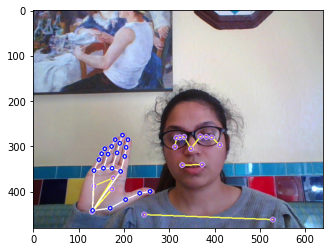

time: 312 ms (started: 2022-05-20 17:06:47 -07:00)


In [9]:
# apply landmarks and show
input_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
#extracting the key-point values into a usable format
results.pose_landmarks

landmark {
  x: 0.44551634788513184
  y: 0.38950762152671814
  z: -0.6026193499565125
  visibility: 0.9999640583992004
}
landmark {
  x: 0.4717724919319153
  y: 0.33889904618263245
  z: -0.5683985948562622
  visibility: 0.9998887777328491
}
landmark {
  x: 0.4917922019958496
  y: 0.336137592792511
  z: -0.5683160424232483
  visibility: 0.9998615384101868
}
landmark {
  x: 0.5090686082839966
  y: 0.33474841713905334
  z: -0.5683325529098511
  visibility: 0.9998946189880371
}
landmark {
  x: 0.42647653818130493
  y: 0.3468840718269348
  z: -0.5370150208473206
  visibility: 0.9998952150344849
}
landmark {
  x: 0.41382789611816406
  y: 0.3496710956096649
  z: -0.5366410613059998
  visibility: 0.9998795986175537
}
landmark {
  x: 0.4033256471157074
  y: 0.35239458084106445
  z: -0.5368320345878601
  visibility: 0.9999220371246338
}
landmark {
  x: 0.5411085486412048
  y: 0.356539785861969
  z: -0.34194740653038025
  visibility: 0.9998840093612671
}
landmark {
  x: 0.4001581072807312
  y: 0.

time: 0 ns (started: 2022-05-20 17:31:02 -07:00)


In [10]:
len(results.face_landmarks.landmark)

468

time: 0 ns (started: 2022-05-20 17:31:02 -07:00)


Pose :33X4=132  for x, y, z & visibility values

Left hand :21X3=63  for x, y & z values

Right hand :21X3=63  for x, y & z values

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)   
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh]) 

time: 15 ms (started: 2022-05-20 17:31:05 -07:00)


In [12]:
result_test = extract_keypoints(results)

time: 0 ns (started: 2022-05-20 17:31:05 -07:00)


In [13]:
np.save('0', result_test)

time: 0 ns (started: 2022-05-20 17:31:06 -07:00)


In [14]:
np.load('0.npy')

array([ 4.45516348e-01,  3.89507622e-01, -6.02619350e-01,  9.99964058e-01,
        4.71772492e-01,  3.38899046e-01, -5.68398595e-01,  9.99888778e-01,
        4.91792202e-01,  3.36137593e-01, -5.68316042e-01,  9.99861538e-01,
        5.09068608e-01,  3.34748417e-01, -5.68332553e-01,  9.99894619e-01,
        4.26476538e-01,  3.46884072e-01, -5.37015021e-01,  9.99895215e-01,
        4.13827896e-01,  3.49671096e-01, -5.36641061e-01,  9.99879599e-01,
        4.03325647e-01,  3.52394581e-01, -5.36832035e-01,  9.99922037e-01,
        5.41108549e-01,  3.56539786e-01, -3.41947407e-01,  9.99884009e-01,
        4.00158107e-01,  3.81755352e-01, -1.70591101e-01,  9.99885082e-01,
        4.84244108e-01,  4.37249482e-01, -5.24078846e-01,  9.99947548e-01,
        4.28961128e-01,  4.45207417e-01, -4.77926105e-01,  9.99940693e-01,
        6.87730134e-01,  6.38647676e-01, -2.54669279e-01,  9.99256968e-01,
        3.27721000e-01,  6.68488681e-01, -2.85175294e-02,  9.99622583e-01,
        7.94161439e-01,  

time: 32 ms (started: 2022-05-20 17:31:06 -07:00)


In [15]:
extract_keypoints(results).shape

(258,)

time: 0 ns (started: 2022-05-20 17:31:07 -07:00)


# Creating folder for dataset collection

sequence_number : 30 videos of data to be collected for each action
    
sequence_length : Each video is of 30 frames in length

In [16]:
# Path for exported data, numpy arrays
data_path = os.path.join('Dataset_folder')
# Actions that we aim to detect
actions = np.array(['hello','me','father','mother','yes','no','help','please', 'thank you','want','what','cat','again or repeat','more','fine','learn','done or finish','open','to','work','iloveyou'])
sequence_number = 30
sequence_length = 30

time: 0 ns (started: 2022-05-20 17:31:09 -07:00)


In [17]:
for action in actions:
    for sequence in range(sequence_number):
        try:
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

time: 125 ms (started: 2022-05-20 17:31:10 -07:00)


We collect all the key-point data by setting up video capture looping through each frame.

We have commented the block because we collected the training dataset for the project and will be reusing it for everty run, unless we want to collect new set of training data uncomment below code.

In [18]:
'''# Run this only once to extract train data
cap = cv2.VideoCapture(0) #to access webcam device

# set mediapipe model
with holistic_mp.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions: # loop through actions
        for sequence in range(sequence_number): # loop through sequences/videos
            for frame_no in range(sequence_length): # loop through video length 
                # read frames
                ret, frame = cap.read()
                # make detections
                image, results = detection_mediapipe(frame, holistic)
                # draw landmarks
                input_landmarks(image, results)               
                # NEW collection wait logic
                if frame_no == 0:
                    cv2.putText(image, 'COLLECTING NOW...', (120, 200),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for Action: {} & Video: {}'.format(action, sequence), (15, 12),cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) # show image on screen
                    cv2.waitKey(1500) # 1.5 seconds break
                else:
                    cv2.putText(image, 'Collecting frames for Action: {} & Video: {}'.format(action, sequence), (15, 12),cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) # show image on screen
                
                # NEW extract key-points
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path, action, str(sequence), str(frame_no))
                np.save(npy_path, keypoints)
                
                # break gracefully if hit 'q' on keyboard
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()           # release webcam
    cv2.destroyAllWindows() # close down all frames'''

"# Run this only once to extract train data\ncap = cv2.VideoCapture(0) #to access webcam device\n\n# set mediapipe model\nwith holistic_mp.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:\n    for action in actions: # loop through actions\n        for sequence in range(sequence_number): # loop through sequences/videos\n            for frame_no in range(sequence_length): # loop through video length \n                # read frames\n                ret, frame = cap.read()\n                # make detections\n                image, results = detection_mediapipe(frame, holistic)\n                # draw landmarks\n                input_landmarks(image, results)               \n                # NEW collection wait logic\n                if frame_no == 0:\n                    cv2.putText(image, 'COLLECTING NOW...', (120, 200),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3, cv2.LINE_AA)\n                    cv2.putText(image, 'Collecting frames for Action: {} & Vi

time: 0 ns (started: 2022-05-20 17:31:12 -07:00)


# Pre-process Data and Create Lables & Features

In [19]:
#actions list
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0,
 'me': 1,
 'father': 2,
 'mother': 3,
 'yes': 4,
 'no': 5,
 'help': 6,
 'please': 7,
 'thank you': 8,
 'want': 9,
 'what': 10,
 'cat': 11,
 'again or repeat': 12,
 'more': 13,
 'fine': 14,
 'learn': 15,
 'done or finish': 16,
 'open': 17,
 'to': 18,
 'work': 19,
 'iloveyou': 20}

time: 16 ms (started: 2022-05-20 17:31:24 -07:00)


In [20]:
sequences, labels = [], [] # blank arrays
for action in actions:
    for sequence in range(sequence_number):
        window = [] # blank array
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

time: 6.83 s (started: 2022-05-20 17:31:25 -07:00)


In [21]:
X = np.array(sequences)
X.shape

(630, 30, 258)

time: 15 ms (started: 2022-05-20 17:31:43 -07:00)


In [22]:
np.array(labels).shape

(630,)

time: 0 ns (started: 2022-05-20 17:31:43 -07:00)


In [23]:
X = np.array(sequences)
y = to_categorical(labels).astype(int) # one-hot-encoding
y.shape

(630, 21)

time: 31 ms (started: 2022-05-20 17:31:44 -07:00)


train_test_split function we will perform training and testing partition with the test partition size being 5% of the data.

In [24]:
x_train_val,x_test,y_train_val,y_test = train_test_split(X, y,stratify=labels,test_size=0.10, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,stratify=y_train_val,test_size=0.10, random_state=42)

time: 47 ms (started: 2022-05-20 17:31:47 -07:00)


In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

time: 0 ns (started: 2022-05-20 17:31:48 -07:00)


In [26]:
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import LSTM, Dense 
from tensorflow.python.keras.callbacks import TensorBoard 

time: 0 ns (started: 2022-05-20 17:31:51 -07:00)


In [27]:
#log_dir = os.path.join('Logs')
#tb_callback = TensorBoard(log_dir=log_dir)

time: 0 ns (started: 2022-05-20 17:31:55 -07:00)


In [28]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of x_val is {}'.format(x_val.shape))
print('Shape of y_val is {}'.format(y_val.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (510, 30, 258)
Shape of y_train is (510, 21)
Shape of x_val is (57, 30, 258)
Shape of y_val is (57, 21)
Shape of x_test is (63, 30, 258)
Shape of y_test is (63, 21)
time: 0 ns (started: 2022-05-20 17:31:56 -07:00)


# Model Implementation & Model Training

# 1) Vanilla RNN-Base Model

In [33]:
vanilla_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, activation='tanh', input_shape=(30, 258)),
    tf.keras.layers.SimpleRNN(128, return_sequences=True, activation='tanh'),
    tf.keras.layers.SimpleRNN(64, return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(actions.shape[0], activation='softmax')
])

time: 328 ms (started: 2022-05-20 15:29:26 -07:00)


In [34]:
vanilla_rnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

time: 15 ms (started: 2022-05-20 15:29:28 -07:00)


In [35]:
vanilla_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 64)            20672     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 128)           24704     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 67,413
Trainable params: 67,413
Non-traina

In [36]:
checkpoint_path = "C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model1/cp.ckpt_1a"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy', verbose=1, 
                                                 save_best_only=True, mode='max')

time: 16 ms (started: 2022-05-20 15:29:53 -07:00)


In [37]:
vanilla_h1 = vanilla_rnn.fit(x_train, y_train,validation_data = (x_val, y_val), epochs=500, callbacks=[cp_callback])

Epoch 1/500
14/16 [=========================>....] - ETA: 0s - loss: 2.8862 - accuracy: 0.1027
Epoch 1: val_accuracy improved from -inf to 0.15789, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model1\cp.ckpt_1a
16/16 [==============================] - 3s 52ms/step - loss: 2.8483 - accuracy: 0.1216 - val_loss: 2.5113 - val_accuracy: 0.1579
Epoch 2/500
15/16 [===========================>..] - ETA: 0s - loss: 2.3980 - accuracy: 0.1708
Epoch 2: val_accuracy did not improve from 0.15789
16/16 [==============================] - 0s 20ms/step - loss: 2.3846 - accuracy: 0.1686 - val_loss: 2.3305 - val_accuracy: 0.1579
Epoch 3/500
13/16 [=======================>......] - ETA: 0s - loss: 2.1370 - accuracy: 0.2308
Epoch 3: val_accuracy improved from 0.15789 to 0.28070, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model1\cp.ckpt_1a
16/16 [====================

15/16 [===========================>..] - ETA: 0s - loss: 0.4933 - accuracy: 0.8604
Epoch 26: val_accuracy improved from 0.82456 to 0.87719, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model1\cp.ckpt_1a
16/16 [==============================] - 0s 30ms/step - loss: 0.4905 - accuracy: 0.8608 - val_loss: 0.5265 - val_accuracy: 0.8772
Epoch 27/500
16/16 [==============================] - ETA: 0s - loss: 0.3883 - accuracy: 0.9157
Epoch 27: val_accuracy did not improve from 0.87719
16/16 [==============================] - 0s 23ms/step - loss: 0.3883 - accuracy: 0.9157 - val_loss: 0.5314 - val_accuracy: 0.8246
Epoch 28/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3595 - accuracy: 0.8917
Epoch 28: val_accuracy did not improve from 0.87719
16/16 [==============================] - 0s 31ms/step - loss: 0.3571 - accuracy: 0.8922 - val_loss: 0.5862 - val_accuracy: 0.8070
Epoch 29/500
14/16 [====================

16/16 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.9039
Epoch 54: val_accuracy did not improve from 0.96491
16/16 [==============================] - 0s 26ms/step - loss: 0.2810 - accuracy: 0.9039 - val_loss: 0.4923 - val_accuracy: 0.8596
Epoch 55/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3360 - accuracy: 0.9104
Epoch 55: val_accuracy did not improve from 0.96491
16/16 [==============================] - 0s 30ms/step - loss: 0.3262 - accuracy: 0.9137 - val_loss: 0.4641 - val_accuracy: 0.8421
Epoch 56/500
16/16 [==============================] - ETA: 0s - loss: 0.5268 - accuracy: 0.8451
Epoch 56: val_accuracy did not improve from 0.96491
16/16 [==============================] - 1s 31ms/step - loss: 0.5268 - accuracy: 0.8451 - val_loss: 0.5881 - val_accuracy: 0.7719
Epoch 57/500
16/16 [==============================] - ETA: 0s - loss: 0.3140 - accuracy: 0.9157
Epoch 57: val_accuracy did not improve from 0.96491
16/16 [========================

16/16 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9843
Epoch 83: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 28ms/step - loss: 0.0827 - accuracy: 0.9843 - val_loss: 0.2953 - val_accuracy: 0.9123
Epoch 84/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0831 - accuracy: 0.9854
Epoch 84: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 26ms/step - loss: 0.0889 - accuracy: 0.9843 - val_loss: 0.4239 - val_accuracy: 0.8947
Epoch 85/500
14/16 [=========================>....] - ETA: 0s - loss: 0.1014 - accuracy: 0.9754
Epoch 85: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 25ms/step - loss: 0.0925 - accuracy: 0.9784 - val_loss: 0.2244 - val_accuracy: 0.9298
Epoch 86/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0585 - accuracy: 0.9875
Epoch 86: val_accuracy did not improve from 0.98246
16/16 [========================

16/16 [==============================] - 0s 25ms/step - loss: 0.9709 - accuracy: 0.6549 - val_loss: 1.0203 - val_accuracy: 0.5965
Epoch 113/500
15/16 [===========================>..] - ETA: 0s - loss: 0.7589 - accuracy: 0.7396
Epoch 113: val_accuracy did not improve from 0.98246
16/16 [==============================] - 1s 31ms/step - loss: 0.7363 - accuracy: 0.7490 - val_loss: 0.5868 - val_accuracy: 0.8070
Epoch 114/500
15/16 [===========================>..] - ETA: 0s - loss: 0.4667 - accuracy: 0.8500
Epoch 114: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 25ms/step - loss: 0.4518 - accuracy: 0.8588 - val_loss: 0.4212 - val_accuracy: 0.9298
Epoch 115/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2793 - accuracy: 0.9354
Epoch 115: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 26ms/step - loss: 0.2937 - accuracy: 0.9294 - val_loss: 0.5735 - val_accuracy: 0.8246
Epoch 116/500
15/16 [=========

Epoch 142/500
16/16 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9843
Epoch 142: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0652 - accuracy: 0.9843 - val_loss: 0.1684 - val_accuracy: 0.9649
Epoch 143/500
16/16 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9961
Epoch 143: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 0.9961 - val_loss: 0.1252 - val_accuracy: 0.9825
Epoch 144/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0658 - accuracy: 0.9833
Epoch 144: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 24ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.1938 - val_accuracy: 0.9649
Epoch 145/500
16/16 [==============================] - ETA: 0s - loss: 0.2172 - accuracy: 0.9412
Epoch 145: val_accuracy did not improve from 0.98246
16/16 [===

15/16 [===========================>..] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000
Epoch 171: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 25ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.1613 - val_accuracy: 0.9825
Epoch 172/500
16/16 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 1.0000
Epoch 172: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.1633 - val_accuracy: 0.9825
Epoch 173/500
16/16 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 1.0000
Epoch 173: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 23ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9825
Epoch 174/500
16/16 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 1.0000
Epoch 174: val_accuracy did not improve from 0.98246
16/16 [=================

16/16 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 200: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 0.9825
Epoch 201/500
16/16 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 201: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1514 - val_accuracy: 0.9825
Epoch 202/500
16/16 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 202: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1514 - val_accuracy: 0.9825
Epoch 203/500
16/16 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 203: val_accuracy did not improve from 0.98246
16/16 [=================

16/16 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 229: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9825
Epoch 230/500
16/16 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 230: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9825
Epoch 231/500
16/16 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 231: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9825
Epoch 232/500
16/16 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 232: val_accuracy did not improve from 0.98246
16/16 [=================

16/16 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 258: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9825
Epoch 259/500
16/16 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 259: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9825
Epoch 260/500
16/16 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 260: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1549 - val_accuracy: 0.9825
Epoch 261/500
16/16 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 261: val_accuracy did not improve from 0.98246
16/16 [=================

14/16 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 287: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 25ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9825
Epoch 288/500
16/16 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 288: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1576 - val_accuracy: 0.9825
Epoch 289/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 289: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 31ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9825
Epoch 290/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 290: val_accuracy did not improve from 0.98246
16/16 [=================

16/16 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 316: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9825
Epoch 317/500
16/16 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 317: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 0.9825
Epoch 318/500
16/16 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 318: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9825
Epoch 319/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 319: val_accuracy did not improve from 0.98246
16/16 [=================

Epoch 345/500
15/16 [===========================>..] - ETA: 0s - loss: 8.3595e-04 - accuracy: 1.0000
Epoch 345: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 8.3069e-04 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9825
Epoch 346/500
16/16 [==============================] - ETA: 0s - loss: 8.2293e-04 - accuracy: 1.0000
Epoch 346: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 8.2293e-04 - accuracy: 1.0000 - val_loss: 0.1633 - val_accuracy: 0.9825
Epoch 347/500
16/16 [==============================] - ETA: 0s - loss: 8.1550e-04 - accuracy: 1.0000
Epoch 347: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 8.1550e-04 - accuracy: 1.0000 - val_loss: 0.1633 - val_accuracy: 0.9825
Epoch 348/500
16/16 [==============================] - ETA: 0s - loss: 8.0785e-04 - accuracy: 1.0000
Epoch 348: val_accuracy did not imp

16/16 [==============================] - 0s 22ms/step - loss: 6.4293e-04 - accuracy: 1.0000 - val_loss: 0.1663 - val_accuracy: 0.9825
Epoch 374/500
16/16 [==============================] - ETA: 0s - loss: 6.3716e-04 - accuracy: 1.0000
Epoch 374: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 6.3716e-04 - accuracy: 1.0000 - val_loss: 0.1665 - val_accuracy: 0.9825
Epoch 375/500
16/16 [==============================] - ETA: 0s - loss: 6.3150e-04 - accuracy: 1.0000
Epoch 375: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 6.3150e-04 - accuracy: 1.0000 - val_loss: 0.1668 - val_accuracy: 0.9825
Epoch 376/500
16/16 [==============================] - ETA: 0s - loss: 6.2583e-04 - accuracy: 1.0000
Epoch 376: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 6.2583e-04 - accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 0.9825
Ep

Epoch 402/500
16/16 [==============================] - ETA: 0s - loss: 4.9733e-04 - accuracy: 1.0000
Epoch 402: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 4.9733e-04 - accuracy: 1.0000 - val_loss: 0.1700 - val_accuracy: 0.9825
Epoch 403/500
16/16 [==============================] - ETA: 0s - loss: 4.9293e-04 - accuracy: 1.0000
Epoch 403: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 4.9293e-04 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 0.9825
Epoch 404/500
16/16 [==============================] - ETA: 0s - loss: 4.8866e-04 - accuracy: 1.0000
Epoch 404: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 4.8866e-04 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9825
Epoch 405/500
16/16 [==============================] - ETA: 0s - loss: 4.8436e-04 - accuracy: 1.0000
Epoch 405: val_accuracy did not imp

16/16 [==============================] - 0s 22ms/step - loss: 3.9013e-04 - accuracy: 1.0000 - val_loss: 0.1743 - val_accuracy: 0.9825
Epoch 431/500
16/16 [==============================] - ETA: 0s - loss: 3.8676e-04 - accuracy: 1.0000
Epoch 431: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 3.8676e-04 - accuracy: 1.0000 - val_loss: 0.1745 - val_accuracy: 0.9825
Epoch 432/500
16/16 [==============================] - ETA: 0s - loss: 3.8346e-04 - accuracy: 1.0000
Epoch 432: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 3.8346e-04 - accuracy: 1.0000 - val_loss: 0.1744 - val_accuracy: 0.9825
Epoch 433/500
16/16 [==============================] - ETA: 0s - loss: 3.8014e-04 - accuracy: 1.0000
Epoch 433: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 3.8014e-04 - accuracy: 1.0000 - val_loss: 0.1749 - val_accuracy: 0.9825
Ep

Epoch 459/500
16/16 [==============================] - ETA: 0s - loss: 3.0444e-04 - accuracy: 1.0000
Epoch 459: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 3.0444e-04 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9825
Epoch 460/500
16/16 [==============================] - ETA: 0s - loss: 3.0188e-04 - accuracy: 1.0000
Epoch 460: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 3.0188e-04 - accuracy: 1.0000 - val_loss: 0.1793 - val_accuracy: 0.9825
Epoch 461/500
16/16 [==============================] - ETA: 0s - loss: 2.9935e-04 - accuracy: 1.0000
Epoch 461: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 21ms/step - loss: 2.9935e-04 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9825
Epoch 462/500
16/16 [==============================] - ETA: 0s - loss: 2.9677e-04 - accuracy: 1.0000
Epoch 462: val_accuracy did not imp

16/16 [==============================] - 0s 23ms/step - loss: 2.4036e-04 - accuracy: 1.0000 - val_loss: 0.1839 - val_accuracy: 0.9825
Epoch 488/500
16/16 [==============================] - ETA: 0s - loss: 2.3835e-04 - accuracy: 1.0000
Epoch 488: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 2.3835e-04 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9825
Epoch 489/500
16/16 [==============================] - ETA: 0s - loss: 2.3638e-04 - accuracy: 1.0000
Epoch 489: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 2.3638e-04 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 0.9825
Epoch 490/500
16/16 [==============================] - ETA: 0s - loss: 2.3443e-04 - accuracy: 1.0000
Epoch 490: val_accuracy did not improve from 0.98246
16/16 [==============================] - 0s 22ms/step - loss: 2.3443e-04 - accuracy: 1.0000 - val_loss: 0.1846 - val_accuracy: 0.9825
Ep

In [38]:
res=vanilla_rnn.predict(x_test)

time: 625 ms (started: 2022-05-20 15:33:41 -07:00)


In [40]:
train_loss,train_accuracy=vanilla_rnn.evaluate(x_train,y_train)
print('Training  Accuracy: {}'.format(train_accuracy))

test_loss,test_accuracy=vanilla_rnn.evaluate(x_test,y_test)
print('Test  Accuracy: {}'.format(test_accuracy))

16/16 [==============================] - 0s 8ms/step - loss: 2.1459e-04 - accuracy: 1.0000
Training  Accuracy: 1.0
2/2 [==============================] - 0s 7ms/step - loss: 0.2228 - accuracy: 0.9524
Test  Accuracy: 0.9523809552192688
time: 359 ms (started: 2022-05-20 15:33:51 -07:00)


In [41]:
actions[np.argmax(res[2])]

'open'

time: 0 ns (started: 2022-05-20 15:33:53 -07:00)


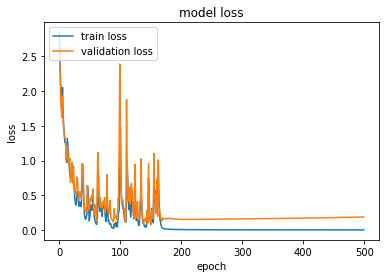

time: 250 ms (started: 2022-05-20 15:33:56 -07:00)


In [42]:
# Loss
loss=vanilla_h1.history['loss']
val=vanilla_h1.history['val_loss']
plt.plot(loss,label ='train loss')
plt.plot(val,label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

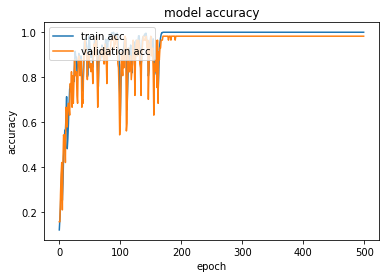

time: 218 ms (started: 2022-05-20 15:34:00 -07:00)


In [43]:
# Accuracy
acc=vanilla_h1.history['accuracy']
val=vanilla_h1.history['val_accuracy']
plt.plot(acc,label ='train acc')
plt.plot(val,label='validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

# 2) LSTM Model : with relu activation function

Sequential modeling : allows us to build a sequential neural network

LSTM layer : provides temporal component for the Neural Network & allows performing action detection

Dense layer : a normal fully connected layer

TensorBoard : allows to perform logging inside TensorBoard web app for tracing & monitoring model during training

In [44]:
lstm_model = Sequential() 
# add 3 set of LSTM layers
lstm_model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=( 30, 258))) # 10 WILL BE 30
lstm_model.add(LSTM(128, return_sequences=True, activation='relu'))
lstm_model.add(LSTM(64, return_sequences=False, activation='relu')) 
# add 3 Dense layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(actions.shape[0], activation='softmax')) # actions layer

time: 469 ms (started: 2022-05-20 15:34:43 -07:00)


In [45]:
lstm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

time: 31 ms (started: 2022-05-20 15:35:18 -07:00)


In [46]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            82688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                693       
Total params: 237,845
Trainable params: 237,845
Non-trainable params: 0
__________________________________________________

In [47]:
checkpoint_path = "C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model2/cp.ckpt_1a"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_categorical_accuracy', verbose=1, 
                                                 save_best_only=True, mode='max')

time: 0 ns (started: 2022-05-20 15:35:55 -07:00)


In [48]:
lstm_h1=lstm_model.fit(x_train, y_train,validation_data = (x_val, y_val), epochs=500, callbacks=[cp_callback])

Epoch 1/500
16/16 [==============================] - 9s 163ms/step - loss: 3.1981 - categorical_accuracy: 0.0608 - val_loss: 3.0103 - val_categorical_accuracy: 0.0702

Epoch 1: val_categorical_accuracy improved from -inf to 0.07018, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model2\cp.ckpt_1a
Epoch 2/500
16/16 [==============================] - 2s 122ms/step - loss: 3.0085 - categorical_accuracy: 0.0941 - val_loss: 3.0101 - val_categorical_accuracy: 0.0877

Epoch 2: val_categorical_accuracy improved from 0.07018 to 0.08772, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model2\cp.ckpt_1a
Epoch 3/500
16/16 [==============================] - 2s 119ms/step - loss: 2.8720 - categorical_accuracy: 0.1373 - val_loss: 2.5902 - val_categorical_accuracy: 0.2105

Epoch 3: val_categorical_accuracy improved from 0.08772 to 0.21053, saving model to C:/Users/yo


Epoch 29: val_categorical_accuracy did not improve from 0.80702
Epoch 30/500
16/16 [==============================] - 2s 115ms/step - loss: 0.4024 - categorical_accuracy: 0.8686 - val_loss: 0.4323 - val_categorical_accuracy: 0.8772

Epoch 30: val_categorical_accuracy improved from 0.80702 to 0.87719, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model2\cp.ckpt_1a
Epoch 31/500
16/16 [==============================] - 2s 127ms/step - loss: 0.3176 - categorical_accuracy: 0.9118 - val_loss: 0.2829 - val_categorical_accuracy: 0.9649

Epoch 31: val_categorical_accuracy improved from 0.87719 to 0.96491, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model2\cp.ckpt_1a
Epoch 32/500
16/16 [==============================] - 2s 157ms/step - loss: 0.2545 - categorical_accuracy: 0.9157 - val_loss: 0.3893 - val_categorical_accuracy: 0.9123

Epoch 32: val_categori

16/16 [==============================] - 2s 110ms/step - loss: 0.2236 - categorical_accuracy: 0.9078 - val_loss: 0.2721 - val_categorical_accuracy: 0.9123

Epoch 63: val_categorical_accuracy did not improve from 1.00000
Epoch 64/500
16/16 [==============================] - 2s 109ms/step - loss: 0.2535 - categorical_accuracy: 0.9137 - val_loss: 0.4189 - val_categorical_accuracy: 0.8596

Epoch 64: val_categorical_accuracy did not improve from 1.00000
Epoch 65/500
16/16 [==============================] - 2s 140ms/step - loss: 0.3507 - categorical_accuracy: 0.8941 - val_loss: 0.2182 - val_categorical_accuracy: 0.9649

Epoch 65: val_categorical_accuracy did not improve from 1.00000
Epoch 66/500
16/16 [==============================] - 2s 128ms/step - loss: 0.1405 - categorical_accuracy: 0.9490 - val_loss: 0.1888 - val_categorical_accuracy: 0.91233 - categorical_accu

Epoch 66: val_categorical_accuracy did not improve from 1.00000
Epoch 67/500
16/16 [==============================] - 2s 131m

16/16 [==============================] - 2s 121ms/step - loss: 0.4060 - categorical_accuracy: 0.8549 - val_loss: 0.6508 - val_categorical_accuracy: 0.8596

Epoch 98: val_categorical_accuracy did not improve from 1.00000
Epoch 99/500
16/16 [==============================] - 2s 118ms/step - loss: 0.2621 - categorical_accuracy: 0.9216 - val_loss: 0.2230 - val_categorical_accuracy: 0.9123

Epoch 99: val_categorical_accuracy did not improve from 1.00000
Epoch 100/500
16/16 [==============================] - 2s 113ms/step - loss: 0.1058 - categorical_accuracy: 0.9725 - val_loss: 0.2891 - val_categorical_accuracy: 0.9474

Epoch 100: val_categorical_accuracy did not improve from 1.00000
Epoch 101/500
16/16 [==============================] - 2s 116ms/step - loss: 0.0742 - categorical_accuracy: 0.9804 - val_loss: 0.0633 - val_categorical_accuracy: 1.0000

Epoch 101: val_categorical_accuracy did not improve from 1.00000
Epoch 102/500
16/16 [==============================] - 2s 120ms/step - loss: 

Epoch 133/500
16/16 [==============================] - 2s 105ms/step - loss: 0.0105 - categorical_accuracy: 0.9961 - val_loss: 0.0903 - val_categorical_accuracy: 0.9825

Epoch 133: val_categorical_accuracy did not improve from 1.00000
Epoch 134/500
16/16 [==============================] - 2s 109ms/step - loss: 0.0044 - categorical_accuracy: 0.9980 - val_loss: 0.0911 - val_categorical_accuracy: 0.9825

Epoch 134: val_categorical_accuracy did not improve from 1.00000
Epoch 135/500
16/16 [==============================] - 2s 103ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0947 - val_categorical_accuracy: 0.9825

Epoch 135: val_categorical_accuracy did not improve from 1.00000
Epoch 136/500
16/16 [==============================] - 2s 104ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_categorical_accuracy: 0.9825

Epoch 136: val_categorical_accuracy did not improve from 1.00000
Epoch 137/500
16/16 [==============================] - 2s 10

Epoch 168/500
16/16 [==============================] - 2s 119ms/step - loss: 0.8500 - categorical_accuracy: 0.6902 - val_loss: 0.8052 - val_categorical_accuracy: 0.7368

Epoch 168: val_categorical_accuracy did not improve from 1.00000
Epoch 169/500
16/16 [==============================] - 2s 116ms/step - loss: 0.8158 - categorical_accuracy: 0.6804 - val_loss: 1.3433 - val_categorical_accuracy: 0.6842

Epoch 169: val_categorical_accuracy did not improve from 1.00000
Epoch 170/500
16/16 [==============================] - 2s 104ms/step - loss: 0.7773 - categorical_accuracy: 0.6784 - val_loss: 1.1184 - val_categorical_accuracy: 0.7368

Epoch 170: val_categorical_accuracy did not improve from 1.00000
Epoch 171/500
16/16 [==============================] - 2s 110ms/step - loss: 0.7955 - categorical_accuracy: 0.7157 - val_loss: 1.0818 - val_categorical_accuracy: 0.7018

Epoch 171: val_categorical_accuracy did not improve from 1.00000
Epoch 172/500
16/16 [==============================] - 2s 12

Epoch 203/500
16/16 [==============================] - 2s 109ms/step - loss: 1.8458 - categorical_accuracy: 0.2549 - val_loss: 1.6954 - val_categorical_accuracy: 0.2982

Epoch 203: val_categorical_accuracy did not improve from 1.00000
Epoch 204/500
16/16 [==============================] - 2s 108ms/step - loss: 1.8058 - categorical_accuracy: 0.2980 - val_loss: 1.7687 - val_categorical_accuracy: 0.3158

Epoch 204: val_categorical_accuracy did not improve from 1.00000
Epoch 205/500
16/16 [==============================] - 2s 109ms/step - loss: 1.8273 - categorical_accuracy: 0.2608 - val_loss: 1.6414 - val_categorical_accuracy: 0.3860

Epoch 205: val_categorical_accuracy did not improve from 1.00000
Epoch 206/500
16/16 [==============================] - 2s 107ms/step - loss: 1.6660 - categorical_accuracy: 0.3392 - val_loss: 1.5881 - val_categorical_accuracy: 0.3860

Epoch 206: val_categorical_accuracy did not improve from 1.00000
Epoch 207/500
16/16 [==============================] - 2s 10

Epoch 238/500
16/16 [==============================] - 2s 102ms/step - loss: 0.9997 - categorical_accuracy: 0.6039 - val_loss: 0.7378 - val_categorical_accuracy: 0.6667

Epoch 238: val_categorical_accuracy did not improve from 1.00000
Epoch 239/500
16/16 [==============================] - 2s 104ms/step - loss: 1.3260 - categorical_accuracy: 0.5667 - val_loss: 0.9028 - val_categorical_accuracy: 0.6316

Epoch 239: val_categorical_accuracy did not improve from 1.00000
Epoch 240/500
16/16 [==============================] - 2s 102ms/step - loss: 1.0147 - categorical_accuracy: 0.6078 - val_loss: 0.7791 - val_categorical_accuracy: 0.7368

Epoch 240: val_categorical_accuracy did not improve from 1.00000
Epoch 241/500
16/16 [==============================] - 2s 102ms/step - loss: 0.8156 - categorical_accuracy: 0.6784 - val_loss: 0.6647 - val_categorical_accuracy: 0.7544

Epoch 241: val_categorical_accuracy did not improve from 1.00000
Epoch 242/500
16/16 [==============================] - 2s 10

Epoch 273/500
16/16 [==============================] - 2s 104ms/step - loss: 0.3293 - categorical_accuracy: 0.8804 - val_loss: 0.4692 - val_categorical_accuracy: 0.8772

Epoch 273: val_categorical_accuracy did not improve from 1.00000
Epoch 274/500
16/16 [==============================] - 2s 100ms/step - loss: 0.3177 - categorical_accuracy: 0.8706 - val_loss: 0.6210 - val_categorical_accuracy: 0.8070

Epoch 274: val_categorical_accuracy did not improve from 1.00000
Epoch 275/500
16/16 [==============================] - 2s 99ms/step - loss: 0.3345 - categorical_accuracy: 0.8745 - val_loss: 0.5851 - val_categorical_accuracy: 0.8596

Epoch 275: val_categorical_accuracy did not improve from 1.00000
Epoch 276/500
16/16 [==============================] - 2s 100ms/step - loss: 0.4015 - categorical_accuracy: 0.8510 - val_loss: 0.5512 - val_categorical_accuracy: 0.8421

Epoch 276: val_categorical_accuracy did not improve from 1.00000
Epoch 277/500
16/16 [==============================] - 2s 99m

Epoch 308/500
16/16 [==============================] - 2s 113ms/step - loss: 0.1398 - categorical_accuracy: 0.9510 - val_loss: 0.3743 - val_categorical_accuracy: 0.8772

Epoch 308: val_categorical_accuracy did not improve from 1.00000
Epoch 309/500
16/16 [==============================] - 2s 114ms/step - loss: 0.1555 - categorical_accuracy: 0.9353 - val_loss: 0.3033 - val_categorical_accuracy: 0.9123

Epoch 309: val_categorical_accuracy did not improve from 1.00000
Epoch 310/500
16/16 [==============================] - 2s 112ms/step - loss: 0.1274 - categorical_accuracy: 0.9529 - val_loss: 0.4225 - val_categorical_accuracy: 0.8596

Epoch 310: val_categorical_accuracy did not improve from 1.00000
Epoch 311/500
16/16 [==============================] - 2s 114ms/step - loss: 0.1301 - categorical_accuracy: 0.9549 - val_loss: 0.3951 - val_categorical_accuracy: 0.8772

Epoch 311: val_categorical_accuracy did not improve from 1.00000
Epoch 312/500
16/16 [==============================] - 2s 11

Epoch 343/500
16/16 [==============================] - 2s 116ms/step - loss: 0.0919 - categorical_accuracy: 0.9765 - val_loss: 0.4167 - val_categorical_accuracy: 0.8772

Epoch 343: val_categorical_accuracy did not improve from 1.00000
Epoch 344/500
16/16 [==============================] - 2s 117ms/step - loss: 0.0869 - categorical_accuracy: 0.9667 - val_loss: 0.4281 - val_categorical_accuracy: 0.8947

Epoch 344: val_categorical_accuracy did not improve from 1.00000
Epoch 345/500
16/16 [==============================] - 2s 115ms/step - loss: 0.0932 - categorical_accuracy: 0.9667 - val_loss: 0.3740 - val_categorical_accuracy: 0.9123

Epoch 345: val_categorical_accuracy did not improve from 1.00000
Epoch 346/500
16/16 [==============================] - 2s 146ms/step - loss: 0.0632 - categorical_accuracy: 0.9784 - val_loss: 0.6270 - val_categorical_accuracy: 0.8596

Epoch 346: val_categorical_accuracy did not improve from 1.00000
Epoch 347/500
16/16 [==============================] - 2s 13

Epoch 378/500
16/16 [==============================] - 2s 119ms/step - loss: 0.2199 - categorical_accuracy: 0.9216 - val_loss: 0.2741 - val_categorical_accuracy: 0.9123

Epoch 378: val_categorical_accuracy did not improve from 1.00000
Epoch 379/500
16/16 [==============================] - 2s 109ms/step - loss: 0.1389 - categorical_accuracy: 0.9569 - val_loss: 0.2474 - val_categorical_accuracy: 0.9298

Epoch 379: val_categorical_accuracy did not improve from 1.00000
Epoch 380/500
16/16 [==============================] - 3s 172ms/step - loss: 0.0923 - categorical_accuracy: 0.9686 - val_loss: 0.4139 - val_categorical_accuracy: 0.8947

Epoch 380: val_categorical_accuracy did not improve from 1.00000
Epoch 381/500
16/16 [==============================] - 3s 167ms/step - loss: 0.0809 - categorical_accuracy: 0.9765 - val_loss: 0.2929 - val_categorical_accuracy: 0.9123

Epoch 381: val_categorical_accuracy did not improve from 1.00000
Epoch 382/500
16/16 [==============================] - 2s 15

Epoch 413/500
16/16 [==============================] - 2s 123ms/step - loss: 0.0142 - categorical_accuracy: 0.9961 - val_loss: 0.4394 - val_categorical_accuracy: 0.9123

Epoch 413: val_categorical_accuracy did not improve from 1.00000
Epoch 414/500
16/16 [==============================] - 2s 117ms/step - loss: 0.0116 - categorical_accuracy: 0.9980 - val_loss: 0.4709 - val_categorical_accuracy: 0.9298

Epoch 414: val_categorical_accuracy did not improve from 1.00000
Epoch 415/500
16/16 [==============================] - 2s 115ms/step - loss: 0.0229 - categorical_accuracy: 0.9941 - val_loss: 0.4616 - val_categorical_accuracy: 0.9123

Epoch 415: val_categorical_accuracy did not improve from 1.00000
Epoch 416/500
16/16 [==============================] - 2s 125ms/step - loss: 0.0229 - categorical_accuracy: 0.9922 - val_loss: 0.3836 - val_categorical_accuracy: 0.9298

Epoch 416: val_categorical_accuracy did not improve from 1.00000
Epoch 417/500
16/16 [==============================] - 2s 13

Epoch 448/500
16/16 [==============================] - 2s 103ms/step - loss: 0.0309 - categorical_accuracy: 0.9922 - val_loss: 0.3289 - val_categorical_accuracy: 0.8947

Epoch 448: val_categorical_accuracy did not improve from 1.00000
Epoch 449/500
16/16 [==============================] - 2s 101ms/step - loss: 0.0217 - categorical_accuracy: 0.9941 - val_loss: 0.3318 - val_categorical_accuracy: 0.9123

Epoch 449: val_categorical_accuracy did not improve from 1.00000
Epoch 450/500
16/16 [==============================] - 2s 104ms/step - loss: 0.0378 - categorical_accuracy: 0.9843 - val_loss: 0.4777 - val_categorical_accuracy: 0.8772

Epoch 450: val_categorical_accuracy did not improve from 1.00000
Epoch 451/500
16/16 [==============================] - 2s 112ms/step - loss: 0.0424 - categorical_accuracy: 0.9863 - val_loss: 0.3727 - val_categorical_accuracy: 0.8947

Epoch 451: val_categorical_accuracy did not improve from 1.00000
Epoch 452/500
16/16 [==============================] - 2s 10


Epoch 482: val_categorical_accuracy did not improve from 1.00000
Epoch 483/500
16/16 [==============================] - 2s 147ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.3051 - val_categorical_accuracy: 0.9298

Epoch 483: val_categorical_accuracy did not improve from 1.00000
Epoch 484/500
16/16 [==============================] - 2s 140ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.3005 - val_categorical_accuracy: 0.9298

Epoch 484: val_categorical_accuracy did not improve from 1.00000
Epoch 485/500
16/16 [==============================] - 2s 135ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.2969 - val_categorical_accuracy: 0.9298

Epoch 485: val_categorical_accuracy did not improve from 1.00000
Epoch 486/500
16/16 [==============================] - 2s 132ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.2976 - val_categorical_accuracy: 0.9298

Epoch 486: val_categorical_accuracy did not improve from 1.

In [49]:
res = lstm_model.predict(x_test)

time: 1.05 s (started: 2022-05-20 15:52:58 -07:00)


In [50]:
train_loss,train_accuracy=lstm_model.evaluate(x_train,y_train)
print('Training  Accuracy: {}'.format(train_accuracy))

test_loss,test_accuracy=lstm_model.evaluate(x_test,y_test)
print('Test  Accuracy: {}'.format(test_accuracy))

16/16 [==============================] - 0s 21ms/step - loss: 6.0576e-04 - categorical_accuracy: 1.0000
Training  Accuracy: 1.0
2/2 [==============================] - 0s 21ms/step - loss: 0.8044 - categorical_accuracy: 0.8889
Test  Accuracy: 0.8888888955116272
time: 547 ms (started: 2022-05-20 15:53:04 -07:00)


In [51]:
actions[np.argmax(res[2])]

'open'

time: 15 ms (started: 2022-05-20 15:53:05 -07:00)


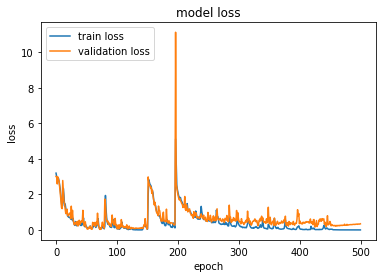

time: 234 ms (started: 2022-05-20 15:53:08 -07:00)


In [52]:
# Loss
loss=lstm_h1.history['loss']
val=lstm_h1.history['val_loss']
plt.plot(loss,label ='train loss')
plt.plot(val,label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

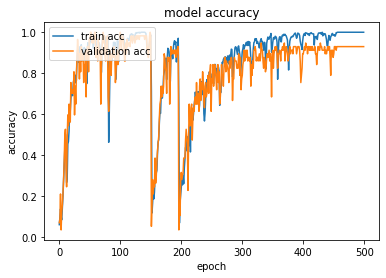

time: 234 ms (started: 2022-05-20 15:53:16 -07:00)


In [53]:
# Accuracy
acc=lstm_h1.history['categorical_accuracy']
val=lstm_h1.history['val_categorical_accuracy']
plt.plot(acc,label ='train acc')
plt.plot(val,label='validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

# 3) LSTM with tanH : with Tanh activation function

In [54]:
lstm_tanh_model = Sequential()
lstm_tanh_model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 258)))
lstm_tanh_model.add(LSTM(128, return_sequences=True, activation='tanh'))
lstm_tanh_model.add(LSTM(64, return_sequences=False, activation='tanh'))
lstm_tanh_model.add(Dense(64, activation='tanh'))
lstm_tanh_model.add(Dense(32, activation='tanh'))
lstm_tanh_model.add(Dense(actions.shape[0], activation='softmax'))

time: 453 ms (started: 2022-05-20 15:54:51 -07:00)


In [55]:
lstm_tanh_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
lstm_tanh_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            82688     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 21)                693       
Total params: 237,845
Trainable params: 237,845
Non-trainable params: 0
________________________________________________

In [56]:
checkpoint_path = "C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model3/cp.ckpt_1a"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_categorical_accuracy', verbose=1, 
                                                 save_best_only=True, mode='max')

time: 0 ns (started: 2022-05-20 15:55:01 -07:00)


In [57]:
lstm_h2=lstm_tanh_model.fit(x_train, y_train,validation_data = (x_val, y_val), epochs=500, callbacks=[cp_callback])

Epoch 1/500
16/16 [==============================] - 8s 132ms/step - loss: 2.9268 - categorical_accuracy: 0.1000 - val_loss: 2.6160 - val_categorical_accuracy: 0.1930

Epoch 1: val_categorical_accuracy improved from -inf to 0.19298, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model3\cp.ckpt_1a
Epoch 2/500
16/16 [==============================] - 2s 134ms/step - loss: 2.3594 - categorical_accuracy: 0.2784 - val_loss: 2.1272 - val_categorical_accuracy: 0.2632

Epoch 2: val_categorical_accuracy improved from 0.19298 to 0.26316, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model3\cp.ckpt_1a
Epoch 3/500
16/16 [==============================] - 2s 132ms/step - loss: 2.0762 - categorical_accuracy: 0.3000 - val_loss: 1.9358 - val_categorical_accuracy: 0.3333

Epoch 3: val_categorical_accuracy improved from 0.26316 to 0.33333, saving model to C:/Users/yo

16/16 [==============================] - 2s 156ms/step - loss: 0.3154 - categorical_accuracy: 0.9235 - val_loss: 0.4059 - val_categorical_accuracy: 0.9474

Epoch 29: val_categorical_accuracy improved from 0.87719 to 0.94737, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model3\cp.ckpt_1a
Epoch 30/500
16/16 [==============================] - 3s 171ms/step - loss: 0.5012 - categorical_accuracy: 0.8431 - val_loss: 0.4232 - val_categorical_accuracy: 0.8772

Epoch 30: val_categorical_accuracy did not improve from 0.94737
Epoch 31/500
16/16 [==============================] - 2s 132ms/step - loss: 0.6436 - categorical_accuracy: 0.7784 - val_loss: 0.6018 - val_categorical_accuracy: 0.8246

Epoch 31: val_categorical_accuracy did not improve from 0.94737
Epoch 32/500
16/16 [==============================] - 2s 143ms/step - loss: 0.6067 - categorical_accuracy: 0.7941 - val_loss: 0.3381 - val_categorical_accuracy: 1.0000

Epoch 

Epoch 63/500
16/16 [==============================] - 2s 114ms/step - loss: 0.0667 - categorical_accuracy: 0.9961 - val_loss: 0.0653 - val_categorical_accuracy: 1.0000

Epoch 63: val_categorical_accuracy did not improve from 1.00000
Epoch 64/500
16/16 [==============================] - 2s 115ms/step - loss: 0.0562 - categorical_accuracy: 0.9961 - val_loss: 0.1347 - val_categorical_accuracy: 0.9649

Epoch 64: val_categorical_accuracy did not improve from 1.00000
Epoch 65/500
16/16 [==============================] - 2s 117ms/step - loss: 0.1008 - categorical_accuracy: 0.9863 - val_loss: 0.2959 - val_categorical_accuracy: 0.9298

Epoch 65: val_categorical_accuracy did not improve from 1.00000
Epoch 66/500
16/16 [==============================] - 2s 119ms/step - loss: 0.0988 - categorical_accuracy: 0.9784 - val_loss: 0.1474 - val_categorical_accuracy: 0.9825

Epoch 66: val_categorical_accuracy did not improve from 1.00000
Epoch 67/500
16/16 [==============================] - 2s 119ms/step 

16/16 [==============================] - 2s 139ms/step - loss: 0.0134 - categorical_accuracy: 1.0000 - val_loss: 0.0148 - val_categorical_accuracy: 1.0000

Epoch 98: val_categorical_accuracy did not improve from 1.00000
Epoch 99/500
16/16 [==============================] - 2s 138ms/step - loss: 0.0131 - categorical_accuracy: 1.0000 - val_loss: 0.0145 - val_categorical_accuracy: 1.0000

Epoch 99: val_categorical_accuracy did not improve from 1.00000
Epoch 100/500
16/16 [==============================] - 3s 172ms/step - loss: 0.0128 - categorical_accuracy: 1.0000 - val_loss: 0.0142 - val_categorical_accuracy: 1.0000

Epoch 100: val_categorical_accuracy did not improve from 1.00000
Epoch 101/500
16/16 [==============================] - 2s 110ms/step - loss: 0.0125 - categorical_accuracy: 1.0000 - val_loss: 0.0139 - val_categorical_accuracy: 1.0000

Epoch 101: val_categorical_accuracy did not improve from 1.00000
Epoch 102/500
16/16 [==============================] - 2s 104ms/step - loss: 

Epoch 133/500
16/16 [==============================] - 2s 112ms/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.0081 - val_categorical_accuracy: 1.0000

Epoch 133: val_categorical_accuracy did not improve from 1.00000
Epoch 134/500
16/16 [==============================] - 2s 111ms/step - loss: 0.0068 - categorical_accuracy: 1.0000 - val_loss: 0.0079 - val_categorical_accuracy: 1.0000

Epoch 134: val_categorical_accuracy did not improve from 1.00000
Epoch 135/500
16/16 [==============================] - 2s 111ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0078 - val_categorical_accuracy: 1.0000

Epoch 135: val_categorical_accuracy did not improve from 1.00000
Epoch 136/500
16/16 [==============================] - 2s 108ms/step - loss: 0.0066 - categorical_accuracy: 1.0000 - val_loss: 0.0077 - val_categorical_accuracy: 1.0000

Epoch 136: val_categorical_accuracy did not improve from 1.00000
Epoch 137/500
16/16 [==============================] - 2s 14

Epoch 168/500
16/16 [==============================] - 2s 129ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.0051 - val_categorical_accuracy: 1.0000

Epoch 168: val_categorical_accuracy did not improve from 1.00000
Epoch 169/500
16/16 [==============================] - 2s 137ms/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.0051 - val_categorical_accuracy: 1.0000

Epoch 169: val_categorical_accuracy did not improve from 1.00000
Epoch 170/500
16/16 [==============================] - 2s 130ms/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.0050 - val_categorical_accuracy: 1.0000

Epoch 170: val_categorical_accuracy did not improve from 1.00000
Epoch 171/500
16/16 [==============================] - 2s 138ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.0049 - val_categorical_accuracy: 1.0000

Epoch 171: val_categorical_accuracy did not improve from 1.00000
Epoch 172/500
16/16 [==============================] - 2s 14

Epoch 203/500
16/16 [==============================] - 2s 115ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0035 - val_categorical_accuracy: 1.0000

Epoch 203: val_categorical_accuracy did not improve from 1.00000
Epoch 204/500
16/16 [==============================] - 2s 142ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0034 - val_categorical_accuracy: 1.0000

Epoch 204: val_categorical_accuracy did not improve from 1.00000
Epoch 205/500
16/16 [==============================] - 2s 111ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0034 - val_categorical_accuracy: 1.0000

Epoch 205: val_categorical_accuracy did not improve from 1.00000
Epoch 206/500
16/16 [==============================] - 2s 108ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0033 - val_categorical_accuracy: 1.0000

Epoch 206: val_categorical_accuracy did not improve from 1.00000
Epoch 207/500
16/16 [==============================] - 2s 10

Epoch 238/500
16/16 [==============================] - 2s 124ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0024 - val_categorical_accuracy: 1.0000

Epoch 238: val_categorical_accuracy did not improve from 1.00000
Epoch 239/500
16/16 [==============================] - 2s 126ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0024 - val_categorical_accuracy: 1.0000

Epoch 239: val_categorical_accuracy did not improve from 1.00000
Epoch 240/500
16/16 [==============================] - 2s 125ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0023 - val_categorical_accuracy: 1.0000

Epoch 240: val_categorical_accuracy did not improve from 1.00000
Epoch 241/500
16/16 [==============================] - 2s 128ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0023 - val_categorical_accuracy: 1.0000

Epoch 241: val_categorical_accuracy did not improve from 1.00000
Epoch 242/500
16/16 [==============================] - 2s 12

Epoch 273/500
16/16 [==============================] - 2s 142ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000

Epoch 273: val_categorical_accuracy did not improve from 1.00000
Epoch 274/500
16/16 [==============================] - 2s 125ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000

Epoch 274: val_categorical_accuracy did not improve from 1.00000
Epoch 275/500
16/16 [==============================] - 2s 152ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000

Epoch 275: val_categorical_accuracy did not improve from 1.00000
Epoch 276/500
16/16 [==============================] - 2s 121ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000

Epoch 276: val_categorical_accuracy did not improve from 1.00000
Epoch 277/500
16/16 [==============================] - 2s 11

Epoch 308/500
16/16 [==============================] - 2s 114ms/step - loss: 9.4079e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 1.0000

Epoch 308: val_categorical_accuracy did not improve from 1.00000
Epoch 309/500
16/16 [==============================] - 2s 115ms/step - loss: 9.3208e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 1.0000

Epoch 309: val_categorical_accuracy did not improve from 1.00000
Epoch 310/500
16/16 [==============================] - 2s 113ms/step - loss: 9.2346e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0012 - val_categorical_accuracy: 1.0000

Epoch 310: val_categorical_accuracy did not improve from 1.00000
Epoch 311/500
16/16 [==============================] - 2s 112ms/step - loss: 9.1497e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0012 - val_categorical_accuracy: 1.0000

Epoch 311: val_categorical_accuracy did not improve from 1.00000
Epoch 312/500
16/16 [=======================

16/16 [==============================] - 2s 113ms/step - loss: 6.8936e-04 - categorical_accuracy: 1.0000 - val_loss: 9.7311e-04 - val_categorical_accuracy: 1.0000

Epoch 342: val_categorical_accuracy did not improve from 1.00000
Epoch 343/500
16/16 [==============================] - 2s 114ms/step - loss: 6.8324e-04 - categorical_accuracy: 1.0000 - val_loss: 9.6412e-04 - val_categorical_accuracy: 1.0000

Epoch 343: val_categorical_accuracy did not improve from 1.00000
Epoch 344/500
16/16 [==============================] - 2s 115ms/step - loss: 6.7712e-04 - categorical_accuracy: 1.0000 - val_loss: 9.6343e-04 - val_categorical_accuracy: 1.0000

Epoch 344: val_categorical_accuracy did not improve from 1.00000
Epoch 345/500
16/16 [==============================] - 2s 116ms/step - loss: 6.7109e-04 - categorical_accuracy: 1.0000 - val_loss: 9.5584e-04 - val_categorical_accuracy: 1.0000

Epoch 345: val_categorical_accuracy did not improve from 1.00000
Epoch 346/500
16/16 [=====================

Epoch 376/500
16/16 [==============================] - 2s 112ms/step - loss: 5.1001e-04 - categorical_accuracy: 1.0000 - val_loss: 7.6049e-04 - val_categorical_accuracy: 1.0000

Epoch 376: val_categorical_accuracy did not improve from 1.00000
Epoch 377/500
16/16 [==============================] - 2s 111ms/step - loss: 5.0556e-04 - categorical_accuracy: 1.0000 - val_loss: 7.5724e-04 - val_categorical_accuracy: 1.0000

Epoch 377: val_categorical_accuracy did not improve from 1.00000
Epoch 378/500
16/16 [==============================] - 2s 114ms/step - loss: 5.0114e-04 - categorical_accuracy: 1.0000 - val_loss: 7.4569e-04 - val_categorical_accuracy: 1.0000

Epoch 378: val_categorical_accuracy did not improve from 1.00000
Epoch 379/500
16/16 [==============================] - 2s 114ms/step - loss: 4.9679e-04 - categorical_accuracy: 1.0000 - val_loss: 7.4479e-04 - val_categorical_accuracy: 1.0000

Epoch 379: val_categorical_accuracy did not improve from 1.00000
Epoch 380/500
16/16 [=======


Epoch 409: val_categorical_accuracy did not improve from 1.00000
Epoch 410/500
16/16 [==============================] - 3s 166ms/step - loss: 3.7995e-04 - categorical_accuracy: 1.0000 - val_loss: 6.1271e-04 - val_categorical_accuracy: 1.0000

Epoch 410: val_categorical_accuracy did not improve from 1.00000
Epoch 411/500
16/16 [==============================] - 2s 128ms/step - loss: 3.7671e-04 - categorical_accuracy: 1.0000 - val_loss: 6.1142e-04 - val_categorical_accuracy: 1.0000

Epoch 411: val_categorical_accuracy did not improve from 1.00000
Epoch 412/500
16/16 [==============================] - 2s 128ms/step - loss: 3.7348e-04 - categorical_accuracy: 1.0000 - val_loss: 6.0816e-04 - val_categorical_accuracy: 1.0000

Epoch 412: val_categorical_accuracy did not improve from 1.00000
Epoch 413/500
16/16 [==============================] - 2s 127ms/step - loss: 3.7031e-04 - categorical_accuracy: 1.0000 - val_loss: 5.9834e-04 - val_categorical_accuracy: 1.0000

Epoch 413: val_categorical_

16/16 [==============================] - 2s 151ms/step - loss: 2.8696e-04 - categorical_accuracy: 1.0000 - val_loss: 5.3341e-04 - val_categorical_accuracy: 1.0000

Epoch 443: val_categorical_accuracy did not improve from 1.00000
Epoch 444/500
16/16 [==============================] - 2s 119ms/step - loss: 2.8454e-04 - categorical_accuracy: 1.0000 - val_loss: 5.3548e-04 - val_categorical_accuracy: 1.0000

Epoch 444: val_categorical_accuracy did not improve from 1.00000
Epoch 445/500
16/16 [==============================] - 2s 107ms/step - loss: 2.8214e-04 - categorical_accuracy: 1.0000 - val_loss: 5.2895e-04 - val_categorical_accuracy: 1.0000

Epoch 445: val_categorical_accuracy did not improve from 1.00000
Epoch 446/500
16/16 [==============================] - 2s 110ms/step - loss: 2.7979e-04 - categorical_accuracy: 1.0000 - val_loss: 5.3646e-04 - val_categorical_accuracy: 1.0000

Epoch 446: val_categorical_accuracy did not improve from 1.00000
Epoch 447/500
16/16 [=====================

Epoch 477/500
16/16 [==============================] - 3s 161ms/step - loss: 2.1564e-04 - categorical_accuracy: 1.0000 - val_loss: 6.5218e-04 - val_categorical_accuracy: 1.0000

Epoch 477: val_categorical_accuracy did not improve from 1.00000
Epoch 478/500
16/16 [==============================] - 3s 169ms/step - loss: 2.1386e-04 - categorical_accuracy: 1.0000 - val_loss: 6.5592e-04 - val_categorical_accuracy: 1.0000

Epoch 478: val_categorical_accuracy did not improve from 1.00000
Epoch 479/500
16/16 [==============================] - 2s 145ms/step - loss: 2.1208e-04 - categorical_accuracy: 1.0000 - val_loss: 6.7106e-04 - val_categorical_accuracy: 1.0000

Epoch 479: val_categorical_accuracy did not improve from 1.00000
Epoch 480/500
16/16 [==============================] - 2s 126ms/step - loss: 2.1032e-04 - categorical_accuracy: 1.0000 - val_loss: 6.4095e-04 - val_categorical_accuracy: 1.0000

Epoch 480: val_categorical_accuracy did not improve from 1.00000
Epoch 481/500
16/16 [=======

In [58]:
res=lstm_tanh_model.predict(x_test)

time: 812 ms (started: 2022-05-20 16:12:56 -07:00)


In [59]:
actions[np.argmax(res[2])]

'open'

time: 0 ns (started: 2022-05-20 16:13:00 -07:00)


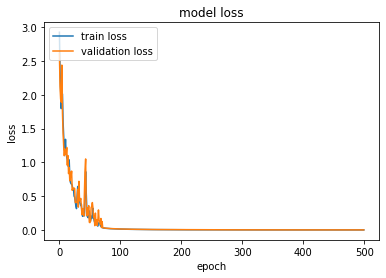

time: 250 ms (started: 2022-05-20 16:13:01 -07:00)


In [60]:
# Loss
loss=lstm_h2.history['loss']
val=lstm_h2.history['val_loss']
plt.plot(loss,label ='train loss')
plt.plot(val,label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

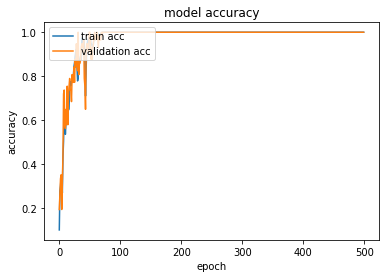

time: 219 ms (started: 2022-05-20 16:13:06 -07:00)


In [61]:
# Accuracy
acc=lstm_h2.history['categorical_accuracy']
val=lstm_h2.history['val_categorical_accuracy']
plt.plot(acc,label ='train acc')
plt.plot(val,label='validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

# 4) GRU Model

In [62]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(64, return_sequences=True, activation='tanh', input_shape=(30, 258)),
    tf.keras.layers.GRU(128, return_sequences=True, activation='tanh'),
    tf.keras.layers.GRU(64, return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(actions.shape[0], activation='softmax')
])

time: 1 s (started: 2022-05-20 16:13:46 -07:00)


In [63]:
GRU_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

time: 15 ms (started: 2022-05-20 16:13:51 -07:00)


In [64]:
GRU_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 64)            62208     
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 21)                1365      
                                                                 
Total params: 183,637
Trainable params: 183,637
Non-tr

In [65]:
checkpoint_path = "C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model4/cp.ckpt_1a"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_categorical_accuracy', verbose=1, 
                                                 save_best_only=True, mode='max')

time: 0 ns (started: 2022-05-20 16:13:59 -07:00)


In [66]:
GRU_h1=GRU_model.fit(x_train, y_train,validation_data = (x_val, y_val), epochs=500, callbacks=[cp_callback])

Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 2.9051 - categorical_accuracy: 0.0706
Epoch 1: val_categorical_accuracy improved from -inf to 0.15789, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model4\cp.ckpt_1a
16/16 [==============================] - 8s 119ms/step - loss: 2.9051 - categorical_accuracy: 0.0706 - val_loss: 2.5247 - val_categorical_accuracy: 0.1579
Epoch 2/500
15/16 [===========================>..] - ETA: 0s - loss: 2.4370 - categorical_accuracy: 0.1875
Epoch 2: val_categorical_accuracy improved from 0.15789 to 0.19298, saving model to C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model4\cp.ckpt_1a
16/16 [==============================] - 1s 58ms/step - loss: 2.4350 - categorical_accuracy: 0.1843 - val_loss: 2.2797 - val_categorical_accuracy: 0.1930
Epoch 3/500
16/16 [==============================] - ETA: 0s - loss: 2.0887 

16/16 [==============================] - 2s 100ms/step - loss: 0.1502 - categorical_accuracy: 0.9725 - val_loss: 0.1283 - val_categorical_accuracy: 1.0000
Epoch 22/500
16/16 [==============================] - ETA: 0s - loss: 0.1243 - categorical_accuracy: 0.9765
Epoch 22: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 2s 98ms/step - loss: 0.1243 - categorical_accuracy: 0.9765 - val_loss: 0.1426 - val_categorical_accuracy: 0.9649
Epoch 23/500
16/16 [==============================] - ETA: 0s - loss: 0.1241 - categorical_accuracy: 0.9706
Epoch 23: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 2s 96ms/step - loss: 0.1241 - categorical_accuracy: 0.9706 - val_loss: 0.1270 - val_categorical_accuracy: 0.9474
Epoch 24/500
16/16 [==============================] - ETA: 0s - loss: 0.1040 - categorical_accuracy: 0.9922
Epoch 24: val_categorical_accuracy did not improve from 1.00000
16/16 [==============

Epoch 47/500
16/16 [==============================] - ETA: 0s - loss: 0.0136 - categorical_accuracy: 1.0000
Epoch 47: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 69ms/step - loss: 0.0136 - categorical_accuracy: 1.0000 - val_loss: 0.0143 - val_categorical_accuracy: 1.0000
Epoch 48/500
16/16 [==============================] - ETA: 0s - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 48: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 70ms/step - loss: 0.0131 - categorical_accuracy: 1.0000 - val_loss: 0.0138 - val_categorical_accuracy: 1.0000
Epoch 49/500
16/16 [==============================] - ETA: 0s - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 49: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 0.0125 - categorical_accuracy: 1.0000 - val_loss: 0.0131 - val_categorical_accuracy: 1.0000
Epoch 50/500
16/16 [==

16/16 [==============================] - ETA: 0s - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 72: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 72ms/step - loss: 0.0059 - categorical_accuracy: 1.0000 - val_loss: 0.0063 - val_categorical_accuracy: 1.0000
Epoch 73/500
16/16 [==============================] - ETA: 0s - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 73: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 70ms/step - loss: 0.0058 - categorical_accuracy: 1.0000 - val_loss: 0.0061 - val_categorical_accuracy: 1.0000
Epoch 74/500
16/16 [==============================] - ETA: 0s - loss: 0.0056 - categorical_accuracy: 1.0000
Epoch 74: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 71ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0059 - val_categorical_accuracy: 1.0000
Epoch 75/500
16/16 [===============

16/16 [==============================] - ETA: 0s - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 97: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 71ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0035 - val_categorical_accuracy: 1.0000
Epoch 98/500
16/16 [==============================] - ETA: 0s - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 98: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 69ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0035 - val_categorical_accuracy: 1.0000
Epoch 99/500
16/16 [==============================] - ETA: 0s - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 99: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 66ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0034 - val_categorical_accuracy: 1.0000
Epoch 100/500
16/16 [==============

16/16 [==============================] - ETA: 0s - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 122: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 73ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0023 - val_categorical_accuracy: 1.0000
Epoch 123/500
16/16 [==============================] - ETA: 0s - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 123: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 71ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0022 - val_categorical_accuracy: 1.0000
Epoch 124/500
16/16 [==============================] - ETA: 0s - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 124: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 68ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0022 - val_categorical_accuracy: 1.0000
Epoch 125/500
16/16 [=========

16/16 [==============================] - ETA: 0s - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 147: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 148/500
16/16 [==============================] - ETA: 0s - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 148: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 62ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 149/500
16/16 [==============================] - ETA: 0s - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 149: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 150/500
16/16 [=========

16/16 [==============================] - ETA: 0s - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 172: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 75ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 173/500
16/16 [==============================] - ETA: 0s - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 173: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 71ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 174/500
16/16 [==============================] - ETA: 0s - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 174: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 70ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 175/500
16/16 [=========

16/16 [==============================] - ETA: 0s - loss: 7.8215e-04 - categorical_accuracy: 1.0000
Epoch 196: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 71ms/step - loss: 7.8215e-04 - categorical_accuracy: 1.0000 - val_loss: 8.2255e-04 - val_categorical_accuracy: 1.0000
Epoch 197/500
16/16 [==============================] - ETA: 0s - loss: 7.7299e-04 - categorical_accuracy: 1.0000
Epoch 197: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 72ms/step - loss: 7.7299e-04 - categorical_accuracy: 1.0000 - val_loss: 8.1357e-04 - val_categorical_accuracy: 1.0000
Epoch 198/500
16/16 [==============================] - ETA: 0s - loss: 7.6418e-04 - categorical_accuracy: 1.0000
Epoch 198: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 70ms/step - loss: 7.6418e-04 - categorical_accuracy: 1.0000 - val_loss: 8.0453e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 5.9653e-04 - categorical_accuracy: 1.0000
Epoch 220: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 5.9653e-04 - categorical_accuracy: 1.0000 - val_loss: 6.2728e-04 - val_categorical_accuracy: 1.0000
Epoch 221/500
16/16 [==============================] - ETA: 0s - loss: 5.9010e-04 - categorical_accuracy: 1.0000
Epoch 221: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 64ms/step - loss: 5.9010e-04 - categorical_accuracy: 1.0000 - val_loss: 6.2047e-04 - val_categorical_accuracy: 1.0000
Epoch 222/500
16/16 [==============================] - ETA: 0s - loss: 5.8375e-04 - categorical_accuracy: 1.0000
Epoch 222: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 63ms/step - loss: 5.8375e-04 - categorical_accuracy: 1.0000 - val_loss: 6.1377e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 4.6215e-04 - categorical_accuracy: 1.0000
Epoch 244: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 66ms/step - loss: 4.6215e-04 - categorical_accuracy: 1.0000 - val_loss: 4.8572e-04 - val_categorical_accuracy: 1.0000
Epoch 245/500
16/16 [==============================] - ETA: 0s - loss: 4.5742e-04 - categorical_accuracy: 1.0000
Epoch 245: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 67ms/step - loss: 4.5742e-04 - categorical_accuracy: 1.0000 - val_loss: 4.8046e-04 - val_categorical_accuracy: 1.0000
Epoch 246/500
16/16 [==============================] - ETA: 0s - loss: 4.5265e-04 - categorical_accuracy: 1.0000
Epoch 246: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 84ms/step - loss: 4.5265e-04 - categorical_accuracy: 1.0000 - val_loss: 4.7565e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 3.6233e-04 - categorical_accuracy: 1.0000
Epoch 268: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 66ms/step - loss: 3.6233e-04 - categorical_accuracy: 1.0000 - val_loss: 3.8017e-04 - val_categorical_accuracy: 1.0000
Epoch 269/500
16/16 [==============================] - ETA: 0s - loss: 3.5881e-04 - categorical_accuracy: 1.0000
Epoch 269: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 67ms/step - loss: 3.5881e-04 - categorical_accuracy: 1.0000 - val_loss: 3.7672e-04 - val_categorical_accuracy: 1.0000
Epoch 270/500
16/16 [==============================] - ETA: 0s - loss: 3.5524e-04 - categorical_accuracy: 1.0000
Epoch 270: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 67ms/step - loss: 3.5524e-04 - categorical_accuracy: 1.0000 - val_loss: 3.7280e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 2.8672e-04 - categorical_accuracy: 1.0000
Epoch 292: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 72ms/step - loss: 2.8672e-04 - categorical_accuracy: 1.0000 - val_loss: 3.0078e-04 - val_categorical_accuracy: 1.0000
Epoch 293/500
16/16 [==============================] - ETA: 0s - loss: 2.8396e-04 - categorical_accuracy: 1.0000
Epoch 293: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 72ms/step - loss: 2.8396e-04 - categorical_accuracy: 1.0000 - val_loss: 2.9773e-04 - val_categorical_accuracy: 1.0000
Epoch 294/500
16/16 [==============================] - ETA: 0s - loss: 2.8127e-04 - categorical_accuracy: 1.0000
Epoch 294: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 71ms/step - loss: 2.8127e-04 - categorical_accuracy: 1.0000 - val_loss: 2.9479e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 2.2853e-04 - categorical_accuracy: 1.0000
Epoch 316: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 2.2853e-04 - categorical_accuracy: 1.0000 - val_loss: 2.3934e-04 - val_categorical_accuracy: 1.0000
Epoch 317/500
16/16 [==============================] - ETA: 0s - loss: 2.2640e-04 - categorical_accuracy: 1.0000
Epoch 317: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 66ms/step - loss: 2.2640e-04 - categorical_accuracy: 1.0000 - val_loss: 2.3707e-04 - val_categorical_accuracy: 1.0000
Epoch 318/500
16/16 [==============================] - ETA: 0s - loss: 2.2431e-04 - categorical_accuracy: 1.0000
Epoch 318: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 67ms/step - loss: 2.2431e-04 - categorical_accuracy: 1.0000 - val_loss: 2.3500e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 1.8321e-04 - categorical_accuracy: 1.0000
Epoch 340: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 62ms/step - loss: 1.8321e-04 - categorical_accuracy: 1.0000 - val_loss: 1.9171e-04 - val_categorical_accuracy: 1.0000
Epoch 341/500
16/16 [==============================] - ETA: 0s - loss: 1.8154e-04 - categorical_accuracy: 1.0000
Epoch 341: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 61ms/step - loss: 1.8154e-04 - categorical_accuracy: 1.0000 - val_loss: 1.8997e-04 - val_categorical_accuracy: 1.0000
Epoch 342/500
16/16 [==============================] - ETA: 0s - loss: 1.7989e-04 - categorical_accuracy: 1.0000
Epoch 342: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 61ms/step - loss: 1.7989e-04 - categorical_accuracy: 1.0000 - val_loss: 1.8825e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 1.4755e-04 - categorical_accuracy: 1.0000
Epoch 364: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 1.4755e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5422e-04 - val_categorical_accuracy: 1.0000
Epoch 365/500
16/16 [==============================] - ETA: 0s - loss: 1.4623e-04 - categorical_accuracy: 1.0000
Epoch 365: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 65ms/step - loss: 1.4623e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5290e-04 - val_categorical_accuracy: 1.0000
Epoch 366/500
16/16 [==============================] - ETA: 0s - loss: 1.4495e-04 - categorical_accuracy: 1.0000
Epoch 366: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 68ms/step - loss: 1.4495e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5159e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 1.1927e-04 - categorical_accuracy: 1.0000
Epoch 388: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 82ms/step - loss: 1.1927e-04 - categorical_accuracy: 1.0000 - val_loss: 1.2457e-04 - val_categorical_accuracy: 1.0000
Epoch 389/500
16/16 [==============================] - ETA: 0s - loss: 1.1823e-04 - categorical_accuracy: 1.0000
Epoch 389: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 87ms/step - loss: 1.1823e-04 - categorical_accuracy: 1.0000 - val_loss: 1.2346e-04 - val_categorical_accuracy: 1.0000
Epoch 390/500
16/16 [==============================] - ETA: 0s - loss: 1.1720e-04 - categorical_accuracy: 1.0000
Epoch 390: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 76ms/step - loss: 1.1720e-04 - categorical_accuracy: 1.0000 - val_loss: 1.2241e-04 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 9.6740e-05 - categorical_accuracy: 1.0000
Epoch 412: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 68ms/step - loss: 9.6740e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0099e-04 - val_categorical_accuracy: 1.0000
Epoch 413/500
16/16 [==============================] - ETA: 0s - loss: 9.5890e-05 - categorical_accuracy: 1.0000
Epoch 413: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 72ms/step - loss: 9.5890e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0007e-04 - val_categorical_accuracy: 1.0000
Epoch 414/500
16/16 [==============================] - ETA: 0s - loss: 9.5063e-05 - categorical_accuracy: 1.0000
Epoch 414: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 66ms/step - loss: 9.5063e-05 - categorical_accuracy: 1.0000 - val_loss: 9.9202e-05 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 7.8640e-05 - categorical_accuracy: 1.0000
Epoch 436: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 63ms/step - loss: 7.8640e-05 - categorical_accuracy: 1.0000 - val_loss: 8.1994e-05 - val_categorical_accuracy: 1.0000
Epoch 437/500
16/16 [==============================] - ETA: 0s - loss: 7.7954e-05 - categorical_accuracy: 1.0000
Epoch 437: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 63ms/step - loss: 7.7954e-05 - categorical_accuracy: 1.0000 - val_loss: 8.1270e-05 - val_categorical_accuracy: 1.0000
Epoch 438/500
16/16 [==============================] - ETA: 0s - loss: 7.7295e-05 - categorical_accuracy: 1.0000
Epoch 438: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 63ms/step - loss: 7.7295e-05 - categorical_accuracy: 1.0000 - val_loss: 8.0592e-05 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 6.4036e-05 - categorical_accuracy: 1.0000
Epoch 460: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 2s 95ms/step - loss: 6.4036e-05 - categorical_accuracy: 1.0000 - val_loss: 6.6713e-05 - val_categorical_accuracy: 1.0000
Epoch 461/500
16/16 [==============================] - ETA: 0s - loss: 6.3501e-05 - categorical_accuracy: 1.0000
Epoch 461: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 77ms/step - loss: 6.3501e-05 - categorical_accuracy: 1.0000 - val_loss: 6.6163e-05 - val_categorical_accuracy: 1.0000
Epoch 462/500
16/16 [==============================] - ETA: 0s - loss: 6.2960e-05 - categorical_accuracy: 1.0000
Epoch 462: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 67ms/step - loss: 6.2960e-05 - categorical_accuracy: 1.0000 - val_loss: 6.5575e-05 - val_categorical_accuracy: 1

16/16 [==============================] - ETA: 0s - loss: 5.2257e-05 - categorical_accuracy: 1.0000
Epoch 484: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 62ms/step - loss: 5.2257e-05 - categorical_accuracy: 1.0000 - val_loss: 5.4385e-05 - val_categorical_accuracy: 1.0000
Epoch 485/500
16/16 [==============================] - ETA: 0s - loss: 5.1812e-05 - categorical_accuracy: 1.0000
Epoch 485: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 62ms/step - loss: 5.1812e-05 - categorical_accuracy: 1.0000 - val_loss: 5.3942e-05 - val_categorical_accuracy: 1.0000
Epoch 486/500
16/16 [==============================] - ETA: 0s - loss: 5.1379e-05 - categorical_accuracy: 1.0000
Epoch 486: val_categorical_accuracy did not improve from 1.00000
16/16 [==============================] - 1s 63ms/step - loss: 5.1379e-05 - categorical_accuracy: 1.0000 - val_loss: 5.3496e-05 - val_categorical_accuracy: 1

In [67]:
res=GRU_model.predict(x_test)

time: 1.08 s (started: 2022-05-20 16:24:03 -07:00)


In [68]:
actions[np.argmax(res[2])]

'open'

time: 0 ns (started: 2022-05-20 16:24:05 -07:00)


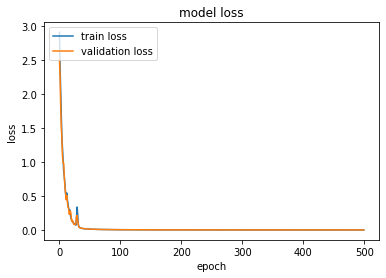

time: 250 ms (started: 2022-05-20 16:24:08 -07:00)


In [69]:
# Loss
loss=GRU_h1.history['loss']
val=GRU_h1.history['val_loss']
plt.plot(loss,label ='train loss')
plt.plot(val,label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show();

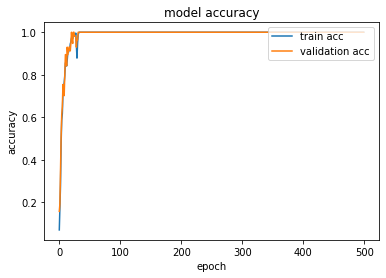

time: 234 ms (started: 2022-05-20 16:24:13 -07:00)


In [70]:
# Accuracy
acc=GRU_h1.history['categorical_accuracy']
val=GRU_h1.history['val_categorical_accuracy']
plt.plot(acc,label ='train acc')
plt.plot(val,label='validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show();

# Model Evaluation

# Vanilla RNN

In [30]:
#resetting the model to basic with no training
vanilla_rnn_test = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, activation='tanh', input_shape=(30, 258)),
    tf.keras.layers.SimpleRNN(128, return_sequences=True, activation='tanh'),
    tf.keras.layers.SimpleRNN(64, return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(actions.shape[0], activation='softmax')
])
vanilla_rnn_test.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
vanilla_rnn_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 64)            20672     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 128)           24704     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 67,413
Trainable params: 67,413
Non-traina

In [31]:
# testing the test accuracy on untrained model
loss, acc = vanilla_rnn_test.evaluate(x_test , y_test, verbose=2)

2/2 - 1s - loss: 3.1038 - accuracy: 0.0476 - 833ms/epoch - 416ms/step
time: 906 ms (started: 2022-05-20 16:35:49 -07:00)


In [34]:
vanilla_rnn_test.load_weights("C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model1/cp.ckpt_1a")

time: 31 ms (started: 2022-05-20 16:37:05 -07:00)


In [35]:
#Now loading the data from the saved models from best performing model with higher validation accuracy

print("Restoring the model saved from the best validation accuracy")
print("------------------------------------------------------------")
print("Model Restored by using the saved models from training")
#vanilla_rnn_test.load_weights(checkpoint_path)
evaluation = vanilla_rnn_test.evaluate(x_train,y_train)
print('Restored model, Training  Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
evaluation = vanilla_rnn_test.evaluate(x_val,y_val)
print('Restored model, Validation Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
loss, acc = vanilla_rnn_test.evaluate(x_test,y_test)
print("Restored model, Test Accuracy: {:5.2f}%".format(100 * acc))

Restoring the model saved from the best validation accuracy
------------------------------------------------------------
Model Restored by using the saved models from training
16/16 [==============================] - 0s 9ms/step - loss: 0.0565 - accuracy: 0.9902
Restored model, Training  Accuracy: 99.02%

2/2 [==============================] - 0s 7ms/step - loss: 0.1244 - accuracy: 0.9825
Restored model, Validation Accuracy: 98.25%

2/2 [==============================] - 0s 11ms/step - loss: 0.2441 - accuracy: 0.9365
Restored model, Test Accuracy: 93.65%
time: 437 ms (started: 2022-05-20 16:37:24 -07:00)


In [36]:
# predict probabilities for test set
yhat_probs = vanilla_rnn_test.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_probs,axis=1)
# predict crisp classes for test set
y_test = np.argmax(y_test, axis=1)
#yhat_classes = vanilla_rnn.predict_classes(x_test, verbose=0)

time: 515 ms (started: 2022-05-20 16:37:39 -07:00)


In [37]:
print(y_test.shape, yhat_classes.shape)
print(y_test[:5], yhat_classes[:5])

(63,) (63,)
[ 6  4 17 10 18] [ 6  4 10 10 18]
time: 15 ms (started: 2022-05-20 16:37:41 -07:00)


In [38]:
yhat_classes

array([ 6,  4, 10, 10, 18, 19, 12, 19, 16,  8, 19, 12, 17,  5,  3,  9,  7,
        5, 15,  5,  2,  0,  1, 14, 10,  0, 10, 20, 11,  8,  6,  3, 11, 16,
       15,  4, 14, 20, 20,  8,  6,  4,  0,  7,  3,  7, 13, 13,  4, 10,  2,
       10,  9, 16, 13,  2, 12, 18,  1,  1, 15, 11, 14], dtype=int64)

time: 0 ns (started: 2022-05-20 16:37:42 -07:00)


In [39]:
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       0.50      1.00      0.67         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [40]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes ,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.936508
Precision: 0.964286
Recall: 0.936508
F1 score: 0.934467
time: 15 ms (started: 2022-05-20 16:37:50 -07:00)


In [41]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.933333
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
time: 16 ms (started: 2022-05-2

# LSTM with Relu

In [30]:
#resetting the model for testing
lstm_model_test = Sequential() 
# add 3 set of LSTM layers
lstm_model_test.add(LSTM(64, return_sequences=True, activation='relu', input_shape=( 30, 258))) # 10 WILL BE 30
lstm_model_test.add(LSTM(128, return_sequences=True, activation='relu'))
lstm_model_test.add(LSTM(64, return_sequences=False, activation='relu')) 
# add 3 Dense layers
lstm_model_test.add(Dense(64, activation='relu'))
lstm_model_test.add(Dense(32, activation='relu'))
lstm_model_test.add(Dense(actions.shape[0], activation='softmax')) # actions layer

lstm_model_test.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            82688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                693       
Total params: 237,845
Trainable params: 237,845
Non-trainable params: 0
__________________________________________________

In [31]:
# testing the test accuracy on untrained model
loss, acc = lstm_model_test.evaluate(x_test , y_test, verbose=2)

2/2 - 1s - loss: 3.0509 - accuracy: 0.0476
time: 1.48 s (started: 2022-05-20 16:45:23 -07:00)


In [32]:
lstm_model_test.load_weights("C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model2/cp.ckpt_1a")

time: 156 ms (started: 2022-05-20 16:46:19 -07:00)


In [33]:
#Now loading the data from the saved models from best performing model with higher validation accuracy

print("Restoring the model saved from the best validation accuracy")
print("------------------------------------------------------------")
print("Model Restored by using the saved models from training")
evaluation = lstm_model_test.evaluate(x_train,y_train)
print('Restored model, Training  Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
evaluation = lstm_model_test.evaluate(x_val,y_val)
print('Restored model, Validation Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
loss, acc = lstm_model_test.evaluate(x_test,y_test)
print("Restored model, Test Accuracy: {:5.2f}%".format(100 * acc))

Restoring the model saved from the best validation accuracy
------------------------------------------------------------
Model Restored by using the saved models from training
16/16 [==============================] - 0s 19ms/step - loss: 0.0726 - accuracy: 0.9843
Restored model, Training  Accuracy: 98.43%

2/2 [==============================] - 0s 22ms/step - loss: 0.0513 - accuracy: 1.0000
Restored model, Validation Accuracy: 100.00%

2/2 [==============================] - 0s 18ms/step - loss: 0.2234 - accuracy: 0.9524
Restored model, Test Accuracy: 95.24%
time: 657 ms (started: 2022-05-20 16:48:33 -07:00)


In [34]:
# predict probabilities for test set
yhat_probs = lstm_model_test.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_probs,axis=1)
# predict crisp classes for test set
y_test = np.argmax(y_test, axis=1)

time: 750 ms (started: 2022-05-20 16:49:23 -07:00)


In [35]:
print(y_test.shape, yhat_classes.shape)
print(y_test[:5], yhat_classes[:5])

(63,) (63,)
[ 6  4 17 10 18] [ 6  4 17 10 18]
time: 0 ns (started: 2022-05-20 16:49:53 -07:00)


In [36]:
yhat_classes

array([ 6,  4, 17, 10, 18, 19, 12, 19, 16,  8, 19, 12, 17,  5,  3,  9,  7,
        5, 15,  5,  2,  0,  1, 14, 17,  0, 17, 20, 11,  8,  6,  3, 11, 16,
       15,  4, 14, 20, 20,  8,  6,  8,  0,  7,  3,  7, 13, 13,  4, 10,  2,
       10,  9, 16, 13,  2, 12, 18,  1,  1, 15, 11, 14], dtype=int64)

time: 16 ms (started: 2022-05-20 16:50:20 -07:00)


In [37]:
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       0.75    

In [38]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes ,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.952381
Precision: 0.960317
Recall: 0.952381
F1 score: 0.951474
time: 15 ms (started: 2022-05-20 16:50:59 -07:00)


In [39]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.950000
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
time: 15 ms (started: 2022-05-2

# LSTM with Tanh

In [31]:
#resetting the model for testing
lstm_tanh_model_test = Sequential()
lstm_tanh_model_test.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 258)))
lstm_tanh_model_test.add(LSTM(128, return_sequences=True, activation='tanh'))
lstm_tanh_model_test.add(LSTM(64, return_sequences=False, activation='tanh'))
lstm_tanh_model_test.add(Dense(64, activation='tanh'))
lstm_tanh_model_test.add(Dense(32, activation='tanh'))
lstm_tanh_model_test.add(Dense(actions.shape[0], activation='softmax'))

lstm_tanh_model_test.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
lstm_tanh_model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            82688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                693       
Total params: 237,845
Trainable params: 237,845
Non-trainable params: 0
__________________________________________________

In [32]:
# testing the test accuracy on untrained model
loss, acc = lstm_tanh_model_test.evaluate(x_test , y_test, verbose=2)

2/2 - 1s - loss: 3.0652 - accuracy: 0.0476
time: 1.45 s (started: 2022-05-20 16:58:47 -07:00)


In [33]:
 lstm_tanh_model_test.load_weights("C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model3/cp.ckpt_1a")

time: 219 ms (started: 2022-05-20 16:58:52 -07:00)


In [35]:

#Now loading the data from the saved models from best performing model with higher validation accuracy

print("Restoring the model saved from the best validation accuracy")
print("------------------------------------------------------------")
print("Model Restored by using the saved models from training")
evaluation = lstm_tanh_model_test.evaluate(x_train,y_train)
print('Restored model, Training  Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
evaluation = lstm_tanh_model_test.evaluate(x_val,y_val)
print('Restored model, Validation Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
loss, acc = lstm_tanh_model_test.evaluate(x_test,y_test)
print("Restored model, Test Accuracy: {:5.2f}%".format(100 * acc))

# predict probabilities for test set

Restoring the model saved from the best validation accuracy
------------------------------------------------------------
Model Restored by using the saved models from training
16/16 [==============================] - 0s 18ms/step - loss: 0.3666 - accuracy: 0.9431
Restored model, Training  Accuracy: 94.31%

2/2 [==============================] - 0s 15ms/step - loss: 0.3381 - accuracy: 1.0000
Restored model, Validation Accuracy: 100.00%

2/2 [==============================] - 0s 14ms/step - loss: 0.4411 - accuracy: 0.9048
Restored model, Test Accuracy: 90.48%
time: 609 ms (started: 2022-05-20 16:59:47 -07:00)


In [37]:
# predict probabilities for test set
yhat_probs = lstm_tanh_model_test.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_probs,axis=1)
# predict crisp classes for test set
y_test = np.argmax(y_test, axis=1)

time: 781 ms (started: 2022-05-20 17:00:44 -07:00)


In [38]:
print(y_test.shape, yhat_classes.shape)
print(y_test[:5], yhat_classes[:5])

(63,) (63,)
[ 6  4 17 10 18] [ 6  4 17 17 18]
time: 0 ns (started: 2022-05-20 17:01:06 -07:00)


In [39]:
yhat_classes

array([ 6,  4, 17, 17, 18, 19, 12, 19, 16,  8, 19, 12, 17,  5,  3,  9,  7,
        5, 15,  5,  2,  0,  1,  1, 17,  0, 17, 20, 11,  8,  6,  3, 11, 16,
       15,  4,  7, 20,  5,  8,  6, 18,  0,  7,  3,  7, 13, 13,  4, 17,  2,
       10,  9, 16, 13,  2, 12, 18,  1,  1, 15, 11, 14], dtype=int64)

time: 15 ms (started: 2022-05-20 17:01:20 -07:00)


In [40]:
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      0.33      0.50         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      0.33      0.50         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       0.50    

In [41]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes ,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.904762
Precision: 0.940476
Recall: 0.904762
F1 score: 0.897052
time: 16 ms (started: 2022-05-20 17:01:56 -07:00)


In [42]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.900000
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
time: 0 ns (started: 2022-05-20

# GRU with Tanh

In [31]:
#resetting the model
GRU_model_test = tf.keras.Sequential([
    tf.keras.layers.GRU(64, return_sequences=True, activation='tanh', input_shape=(30, 258)),
    tf.keras.layers.GRU(128, return_sequences=True, activation='tanh'),
    tf.keras.layers.GRU(64, return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(actions.shape[0], activation='softmax')
])

GRU_model_test.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
GRU_model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 64)            62208     
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 183,637
Trainable params: 183,637
Non-trai

In [31]:
# testing the test accuracy on untrained model
loss, acc = GRU_model_test.evaluate(x_test , y_test, verbose=2)

2/2 - 2s - loss: 3.0676 - accuracy: 0.0476 - 2s/epoch - 1s/step
time: 2.52 s (started: 2022-05-20 17:08:16 -07:00)


In [32]:
GRU_model_test.load_weights("C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model4/cp.ckpt_1a")

time: 156 ms (started: 2022-05-20 17:09:56 -07:00)


In [33]:
print("Restoring the model saved from the best validation accuracy")
print("------------------------------------------------------------")
print("Model Restored by using the saved models from training")
evaluation = GRU_model_test.evaluate(x_train,y_train)
print('Restored model, Training  Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
evaluation = GRU_model_test.evaluate(x_val,y_val)
print('Restored model, Validation Accuracy: {:5.2f}%\n'.format(100 * evaluation[1]))
loss, acc = GRU_model_test.evaluate(x_test,y_test)
print("Restored model, Test Accuracy: {:5.2f}%".format(100 * acc))


Restoring the model saved from the best validation accuracy
------------------------------------------------------------
Model Restored by using the saved models from training
16/16 [==============================] - 0s 21ms/step - loss: 0.1295 - accuracy: 0.9843
Restored model, Training  Accuracy: 98.43%

2/2 [==============================] - 0s 15ms/step - loss: 0.1283 - accuracy: 1.0000
Restored model, Validation Accuracy: 100.00%

2/2 [==============================] - 0s 26ms/step - loss: 0.2717 - accuracy: 0.9048
Restored model, Test Accuracy: 90.48%
time: 641 ms (started: 2022-05-20 17:10:36 -07:00)


In [34]:
# predict probabilities for test set
yhat_probs = GRU_model_test.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_probs,axis=1)
# predict crisp classes for test set
y_test = np.argmax(y_test, axis=1)


time: 1.12 s (started: 2022-05-20 17:11:12 -07:00)


In [36]:
print(y_test.shape, yhat_classes.shape)
print(y_test[:5], yhat_classes)

(63,) (63,)
[ 6  4 17 10 18] [ 6 18 17 10 18 19 12 19 16  8 19 12 17  5  3  9  1  5 15  5  2  0  1 14
 17  0 10 20 11  8  6  3 11 16 15  4 14 20 20  8  6 18  0  1  3  1 13 13
  4 10  2 10  9 16 13  2 12 18  1  1 15 14 14]
time: 0 ns (started: 2022-05-20 17:11:41 -07:00)


In [37]:
yhat_classes

array([ 6, 18, 17, 10, 18, 19, 12, 19, 16,  8, 19, 12, 17,  5,  3,  9,  1,
        5, 15,  5,  2,  0,  1, 14, 17,  0, 10, 20, 11,  8,  6,  3, 11, 16,
       15,  4, 14, 20, 20,  8,  6, 18,  0,  1,  3,  1, 13, 13,  4, 10,  2,
       10,  9, 16, 13,  2, 12, 18,  1,  1, 15, 14, 14], dtype=int64)

time: 0 ns (started: 2022-05-20 17:11:55 -07:00)


In [38]:
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       0.75      1.00      0.86         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [39]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes ,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.904762
Precision: 0.892857
Recall: 0.904762
F1 score: 0.887528
time: 16 ms (started: 2022-05-20 17:12:25 -07:00)


In [40]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.900000
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
time: 15 ms (started: 2022-05-2

# Loading the best performing model for prediction

In [32]:
model = GRU_model_test

time: 0 ns (started: 2022-05-20 17:35:17 -07:00)


In [33]:
 model.load_weights("C:/Users/yogita/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.10/255_Final_project/model4/cp.ckpt_1a")

time: 110 ms (started: 2022-05-20 17:35:23 -07:00)


In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 64)            62208     
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 183,637
Trainable params: 183,637
Non-trai

In [35]:
yhat = model.predict(x_test)

time: 1.14 s (started: 2022-05-20 17:35:35 -07:00)


In [36]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

array([[[60,  0],
        [ 0,  3]],

       [[57,  3],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 1,  2]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 3,  0]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 1,  2]],

       [[59,  1],
        [ 0,  3]],

       [[60,  0],
        [ 1,  2]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[59,  1],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[59,  1],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]],

       [[60,  0],
        [ 0,  3]]], dtype=int64)

time: 16 ms (started: 2022-05-20 17:35:38 -07:00)


In [37]:
accuracy_score(ytrue, yhat)

0.9047619047619048

time: 0 ns (started: 2022-05-20 17:35:43 -07:00)


In [39]:
evaluation = model.evaluate(x_train, y_train)
print('Training  Accuracy: {}'.format(evaluation[1]))
evaluation = model.evaluate(x_test, y_test)
print('Validation Accuracy: {}'.format(evaluation[1]))

16/16 [==============================] - 2s 15ms/step - loss: 0.1295 - categorical_accuracy: 0.9843
Training  Accuracy: 0.9843137264251709
2/2 [==============================] - 0s 26ms/step - loss: 0.2717 - categorical_accuracy: 0.9048
Validation Accuracy: 0.9047619104385376
time: 2.19 s (started: 2022-05-20 17:36:01 -07:00)


In [41]:
yhat_t = model.predict(x_train)
ytrue_t = np.argmax(y_train, axis=1).tolist()
yhat_t = np.argmax(yhat_t, axis=1).tolist()
multilabel_confusion_matrix(ytrue_t, yhat_t)

array([[[486,   0],
        [  0,  24]],

       [[480,   6],
        [  0,  24]],

       [[486,   0],
        [  0,  24]],

       [[485,   0],
        [  0,  25]],

       [[486,   0],
        [  1,  23]],

       [[485,   0],
        [  0,  25]],

       [[486,   0],
        [  0,  24]],

       [[486,   0],
        [  6,  18]],

       [[486,   0],
        [  0,  24]],

       [[486,   0],
        [  0,  24]],

       [[486,   0],
        [  0,  24]],

       [[486,   0],
        [  0,  24]],

       [[485,   0],
        [  1,  24]],

       [[485,   1],
        [  0,  24]],

       [[486,   0],
        [  0,  24]],

       [[485,   0],
        [  0,  25]],

       [[486,   0],
        [  0,  24]],

       [[486,   0],
        [  0,  24]],

       [[485,   1],
        [  0,  24]],

       [[485,   0],
        [  0,  25]],

       [[485,   0],
        [  0,  25]]], dtype=int64)

time: 313 ms (started: 2022-05-20 17:36:27 -07:00)


In [42]:
accuracy_score(ytrue_t, yhat_t)

0.984313725490196

time: 0 ns (started: 2022-05-20 17:36:34 -07:00)


In [43]:
colors = [(245,117,16), (117,245,16), (16,117,245),(117, 16, 245),(245,16,117), (16,117,245),(117, 16, 245),
          (245,16,117), (16,117,245),(117, 16, 245), (16,117,245),(117, 16, 245),(245,16,117), (16,117,245)
          ,(245,16,117), (16,117,245),(117, 16, 245),(245,16,117), (16,117,245),(117, 16, 245),(245,16,117)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    prob_cutoff=0
    action_num=0
    for num, prob in enumerate(res):
        if prob>prob_cutoff:
            prob_cutoff=prob
            action_num=num
        else:
            pass          
    
        res_probability = str(actions[action_num]) + ' ' + str((int(prob_cutoff*100))) + '%'
        cv2.rectangle(output_frame,(1,0), (350, 40), (18, 255, 17), -1)
        cv2.putText(output_frame,res_probability, (0,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
        
    return output_frame

time: 0 ns (started: 2022-05-20 17:36:38 -07:00)


# New real time detection

In [49]:
# new prediction
sequence = []
sentence = []
predictions = []
threshold = 0.9


cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(0)
width =int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 1)
height =int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 1)
size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('model_output.avi', 0, cv2.VideoWriter_fourcc(*'MJPG'), 30, (width, height))

# set mediapipe model
with holistic_mp.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    # loop through all frames
    while cap.isOpened():     

        # read frames
        ret, frame = cap.read()

        # make detections
        image, results = detection_mediapipe(frame, holistic)
       
        # draw formatted landmarks
        input_landmarks(image, results)        

        #2. prediction logic
        # extracting the keypoints
        keypoints = extract_keypoints(results) 
        sequence.append(keypoints)
        #grab last 30 frames
        sequence = sequence[-30:] 
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))            

        #3. visualisation logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
                if res[np.argmax(res)] > threshold:
                
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                        
            if len(sentence) > 5:
                sentence = sentence[-5:]
               
            #4. visualization probabilites
            image = prob_viz(res, actions, image, colors)
        
        cv2.putText(image, "Group 9 : Sign Language Detection project         ", (50,height-20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (18, 17,255), 2, cv2.LINE_AA)
                            
        # show image on screen
        cv2.imshow('OpenCV Feed', image)

        # break gracefully if hit 'q' on keyboard
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
     # release webcam
    cap.release() 
    # close down all frames
    cv2.destroyAllWindows() 

time: 2min 39s (started: 2022-05-20 17:44:29 -07:00)
